# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание предоставленных данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
re_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
re_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Предварительный вывод после ознакомления:
- Всего 23699 строк данных.
- Нет пропусков в данных о стоимости объекта, площади объекта, дате выставления, числу комнат, этажности.
- Небольшое кол-во пропусков в общей этажности, жилой площади, площади кухни, глобального расположения (на уровне - город, т.е. Санкт-Петербург, поселок/городок в пригороде) и данных о днях экспозиции.
- Остальные данные имеют значительные пропуски, но в силу того, что данные как минимум о цене/площади/числу комнат/этажности полны, мы не будем удалять какие-либо строки с данными.
- Возможность заполнения пропусков данных оценим после более внимательного ознакомления.
- Сразу видно, что надо преобразовать столбец .first_day_exposition в тип datatime

In [4]:
column_to_convert = 'first_day_exposition'
data_type_before = re_data[column_to_convert].dtype
re_data[column_to_convert]= pd.to_datetime(re_data[column_to_convert], format='%Y.%m.%dT%H:%M:%S', errors='ignore')
# Указываем значение параметра errors='ignore' - в случае ошибки в преобразовании тип данных не изменится
data_type_after = re_data[column_to_convert].dtype
print(data_type_before, '-->', data_type_after)

object --> datetime64[ns]


In [5]:
re_data.describe() # изучим данные в числовых столбцах

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
for col in re_data.columns: # изучим данные в столбцах boolean и object
    data_type = re_data[col].dtype
    if data_type == 'object':
        print("Столбец: {}, тип данных: {}, непустых значений: {}".format(col, data_type, re_data[col].count()))
        print(re_data[col].value_counts().head(10))
        print('____')
    if data_type == 'bool':
        print("Столбец: {}, тип данных: {}, непустых значений: {}".format(col, data_type, re_data[col].count()))
        print(re_data[col].mean())
        print('____')

Столбец: is_apartment, тип данных: object, непустых значений: 2775
False    2725
True       50
Name: is_apartment, dtype: int64
____
Столбец: studio, тип данных: bool, непустых значений: 23699
0.006287185113295919
____
Столбец: open_plan, тип данных: bool, непустых значений: 23699
0.002827123507320984
____
Столбец: locality_name, тип данных: object, непустых значений: 23650
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64
____


### Вывод:
- Столбцы last_price, total_area, rooms, floor, studio, open_plan не требует пока никакого вмешательства - данные полны и, судя по квартилям, мин/макс, нет явных аномалий
- Столбец locality_name имеет незначительное кол-во пропусков, около 0,2%, заполнить их разумной информацией не представляется возможным, оставляем без изменений. Для повышения эффективности операций с данными этого столбца представляется целесообразным преобразовать тип данных из object в category. Попробуем это сделать после оценки кол-ва уникальных значений. 
- Столбец is_apartment имеет около 90% пропусков. При этом в строках, где есть данные, 50 True и 2725 False. Понятно, что апартаментов должно быть гораздо меньше, чем квартир, в таком случае, вроде бы разумно заполнить пропуски False. Однако мы, во-первых, не знаем статистику по этому параметру и не можем оценить насколько такая замена будет адекватной, во-вторых, если мы все таки произведем такую замену, у нас получится только 50 строк данных с апартаментами и любая выявленная нами зависимость от этого параметра не будет надежной. Оставляем как есть, понимая, что зависимость от этого параметра мы оценить в настоящем исследовании не можем
- Оставшиеся столбцы рассмотрим более внимательно.

### Шаг 2 и 3. Предобработка и анализ  данных, добавление расчетных данных

##### Местоположение объекта

In [7]:
re_data['locality_name'].nunique()

364

In [8]:
# всего 364 названия в более 20К строк, это значит, что надо преобразовать object в category
# re_data['locality_name'] = re_data['locality_name'].astype('category')

##### Общая этажность здания

У нас есть полные данные по этажности объекта и есть немного, менее 100 строк, пропусков по общей этажности здания. Причем, судя по квартилям, мин/макс и среднему, данные не имеют в большом количестве явных выбросов.
Может быть пропуски отражают тот факт, что объект является частным домом (в таком случае этажность объекта будет низкой), или же этажность здания не названа в случаях, когда этажность объекта = первый или последний этаж ?
Проверим

In [9]:
re_data[re_data['floors_total'].isna()]['floor'].value_counts(sort=False).head(16) # смотрим этажность объекта там, где этажность здания не указана
# Мы не используем гистограмму для данного анализа, поскольку, во-первых, кол-во уникальных значений мало, 
# во-вторых, мы хотим видеть точные значения этажности для пиков, в гистограмме можно ошибиться 

1      3
2      2
3      4
4     10
5      4
6      9
7      4
8      8
9      5
10     3
11     3
12     6
13     3
14     2
15     3
17     1
Name: floor, dtype: int64

Очевидно, нет пика на 1, есть пики на 4, 6, 8, 12 этажах (возможно, в Питере много 4-, 6-, 8-, 12- этажных домов), но этих данных недостаточно, чтобы заполнить пропуски разумным способом. Пока, сохраняем пропуски. 

Осталось только оценить гистограммы и провести очевидное сравнение  - ясно, что этажность объекта, должна быть не выше, чем этажность здания.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd10a36ee10>,
      dtype=object)

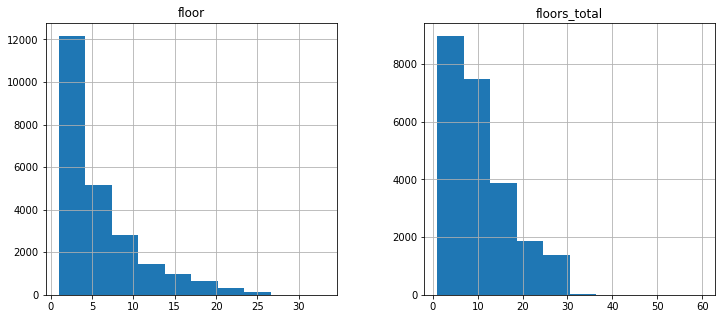

In [10]:
re_data[['floors_total', 'floor']].hist(figsize=(12,5)) 

Распределение данных по этажам соответствует ожиданиям, никаких аномалий не видно

In [11]:
# Сделаем проверку на предмет - во всех ли строках данные floor не превышают данных floors_total
# Подобную проверку надо будет провести несколько раз для разных пар столбцов, немного автоматизации не помешает

def compare_columns(col_whole, col_part, col_with_na):
    rows_not_nan = re_data[col_with_na].notna() # задаем фильтр, исключив NaN
    there_is_mistake = re_data[rows_not_nan][col_part] > re_data[rows_not_nan][col_whole] # сравниваем столбцы
    number_wrong_rows = there_is_mistake.sum()
    if number_wrong_rows == 0:
        return 'Данные в столбце {} не превышают {}'.format(col_part, col_whole)
    else:
        return 'Ошибка - {} неправильных значений'.format(number_wrong_rows)

print(compare_columns(col_whole='floors_total', col_part='floor', col_with_na='floors_total'))

Данные в столбце floor не превышают floors_total


In [12]:
# Добавим новый категориальный столбец, характеризующий этажность объекта
def floor_category_func(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] < row['floors_total']:
        return 'другой'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'NaN, но не первый'
# Производительность .appply с такой функцией низкая
# Ниже закомментирован код более эффективный.
# Он не такой читаемый, к тому же в нем важна последовательность применения фильтров, что не очевидно, чревато ошибками.
"""
filter = re_data['floor'] < re_data['floors_total']
re_data.loc[filter, 'floor_category'] = 'другой'
filter = re_data['floor'] == re_data['floors_total']
re_data.loc[filter, 'floor_category'] = 'последний'
filter = re_data['floor'] == 1
re_data.loc[filter, 'floor_category'] = 'первый'
"""
re_data['floor_category'] = re_data.apply(floor_category_func, axis=1)
re_data['floor_category'] = re_data['floor_category'].astype('category') # оптимизируем тип в category
re_data['floor_category'].value_counts()

другой               17363
последний             3336
первый                2917
NaN, но не первый       83
Name: floor_category, dtype: int64

##### Высота потолков

Мы уже знаем, что общее кол-во непустых  строк составляет около 65% от общего числа. По процентилям, мин/макс и среднему видны какие-то невероятные значения в 1 и 100 м. Разберемся.

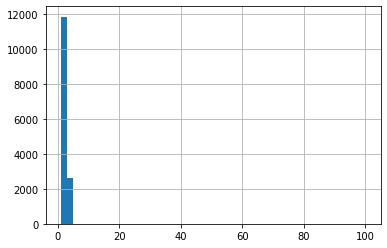

In [13]:
re_data['ceiling_height'].hist(bins=50)

Выбросы в слишком больших значениях и слишком малых на общей диаграмме не видны - их мало, масштаб не позволяет их увидеть. Сделаем отдельные гистограммы для больших и малых величин (хвостов), и посмотрим распределение между

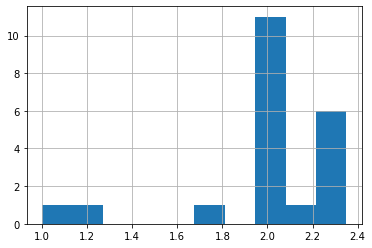

In [14]:
re_data['ceiling_height'].hist(range=(1, 2.35))

In [15]:
re_data.query('ceiling_height < 2.2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.5,6,NaN,...,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,другой
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.0,4,NaN,...,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN,другой
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.6,9,NaN,...,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0,другой
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,первый
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,NaN,...,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0,последний
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.2,12,NaN,...,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0,другой
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5.0,63.9,2,NaN,...,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN,другой
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5.0,20.0,5,False,...,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0,последний
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,другой
19098,7,2700000.0,56.00,2018-02-04,3,2.00,5.0,46.0,1,NaN,...,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0,первый


Количество объектов с чрезмерно низкими потолками невелико, судя по значениям в других столбцах, это похоже на ошибки ввода информации.

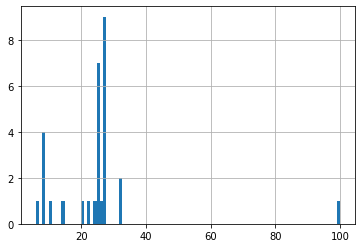

In [16]:
re_data['ceiling_height'].hist(range=(6,100), bins=95)

Слишком высоких потолков тоже очень немного, и всего один невероятный объект с потолком 100 метров.

In [17]:
re_data.query('ceiling_height > 25')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,другой
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,другой
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,другой
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,другой
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,другой
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0,другой
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0,другой
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4.0,22.0,2,NaN,...,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0,другой
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0,другой
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN,последний


И в объектах со слишком высокими потолками тоже похоже на ошибки ввода данных

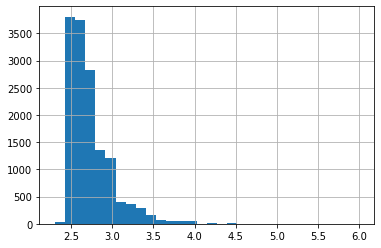

In [18]:
re_data['ceiling_height'].hist(range=(2.3, 6), bins=30)

Между 2.3 и 6 м все в порядке, соответствует здравому смыслу и статистике. 

Итак, у нас есть около 40% пропущенных данных, я не вижу разумного способа заменить их каким-либо значением - учитывая, что мы, возможно, собираемся выводить зависимость стоимости квадратного метра от этого показателя. В оставшихся данных есть незначительное кол-во слишком малых и слишком больших величин, судя по всему, относящихся к специфическим объектам, либо просто одиночные ошибки ввода информации. Зависимость стоимости квадратного метра от высоты потолка вряд ли является непрерывной. Здравый смысл говорит, что люди ориентируются на категориальные величины - "низкие потолки, как в хруще", "нормальные потолки в сталинках", "очень высокие потолки в "дворцах"". С учетом этого факта, а также в виду наличия большого кол-ва незаполняемых пропусков разумно создать категориальный столбец - 'ceiling_category'

In [19]:
ceiling_category_dict = {
    1 : [2.2, 'до 2.2м'],
    2 : [2.59, 'хрущ 2.3-2.6'],
    3 : [2.8, 'брежнев 2.6-2.8'],
    4 : [3.5, 'сталин 2.8-3.5'],
    5 : [10,  'дворец 3.5-10'],
    6 : [100, '10м - 100м'],
}
def ceiling_category(val):
    if val < ceiling_category_dict[1][0]:
        return ceiling_category_dict[1][1]
    elif val <= ceiling_category_dict[2][0]:
        return ceiling_category_dict[2][1]
    elif val <= ceiling_category_dict[3][0]:
        return ceiling_category_dict[3][1]
    elif val <= ceiling_category_dict[4][0]:
        return ceiling_category_dict[4][1]
    elif val <= ceiling_category_dict[5][0]:
        return ceiling_category_dict[5][1]
    elif val <= ceiling_category_dict[6][0]:
        return ceiling_category_dict[6][1]
    else:
        return 'нет данных'
re_data['ceiling_category'] = re_data['ceiling_height'].apply(ceiling_category)
re_data['ceiling_category'] = re_data['ceiling_category'].astype('category') # оптимизируем тип
re_data['ceiling_category'].value_counts()

нет данных         9195
брежнев 2.6-2.8    6279
хрущ 2.3-2.6       5136
сталин 2.8-3.5     2771
дворец 3.5-10       279
10м - 100м           25
до 2.2м              14
Name: ceiling_category, dtype: int64

##### Площадь объекта: общая, жилая, кухня

Мы уже знаем, что общая площадь представлена без пропусков и есть незначительное число пропусков в жилой площади и площади кухни. По квартилям, мин/макс и среднему нет серьезных аномалий. Посмотрим гистограммы (хвосты, норма) и сравним столбцы, исходя из очевидного правила: кухня <= общей площади, жилая площадь <= общей площади

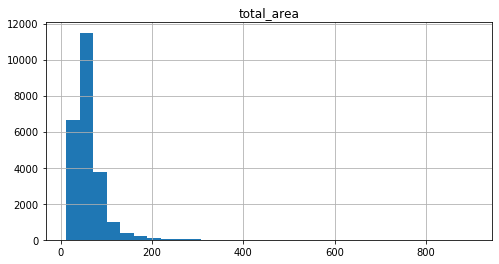

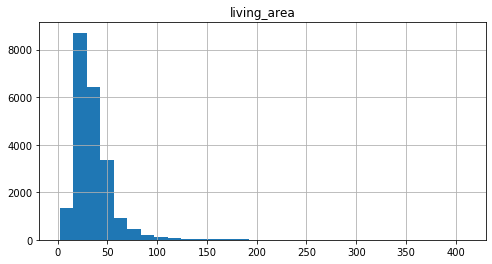

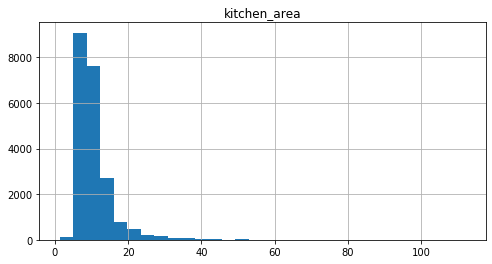

In [20]:
for c in ['total_area', 'living_area', 'kitchen_area']:
    re_data.hist(c, bins=30, figsize=(8,4)) 

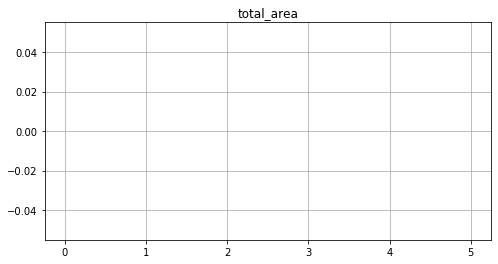

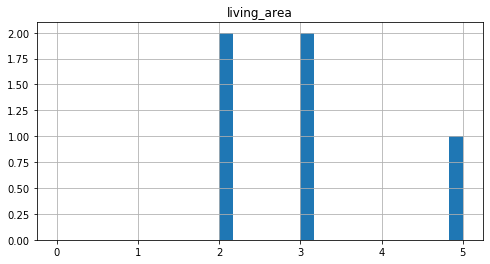

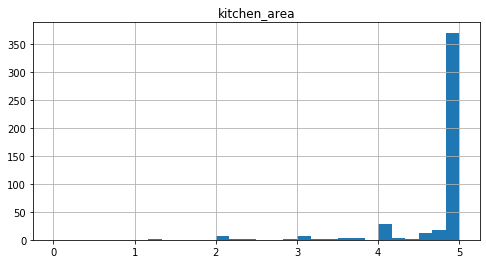

In [21]:
for c in ['total_area', 'living_area', 'kitchen_area']:
    re_data.hist(c, bins=30, figsize=(8,4), range=(0, 5)) 

Видно, что гистограммы на значениях менее 5 м не показывают явных ошибок, есть буквально несколько объектов с экзотическими значениями 2, 3 и 5 м для жилой площади, но это пока не дает повода как-то отдельно заниматься этими данными

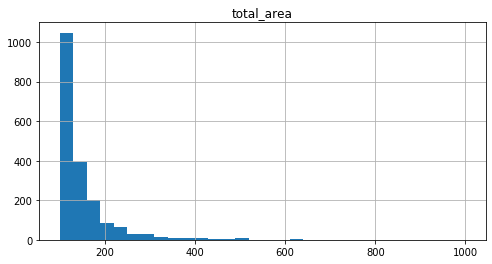

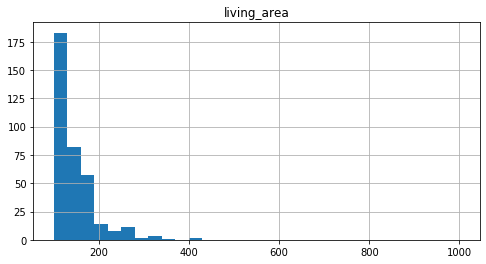

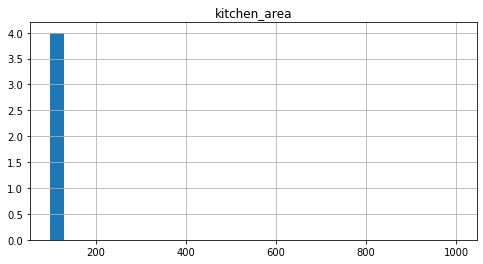

In [22]:
for c in ['total_area', 'living_area', 'kitchen_area']:
    re_data.hist(c, bins=30, figsize=(8,4), range=(100, 1000)) 

С площадями более 100 м (специально задали такой уровень, чтобы посмотреть максимум для кухни - всего 4 объекта) все также неплохо - нет причин заниматься отдельно и этим хвостом

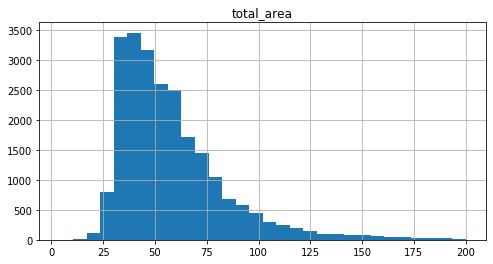

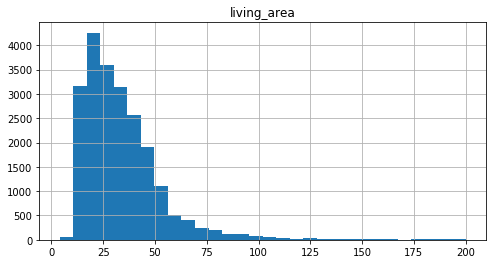

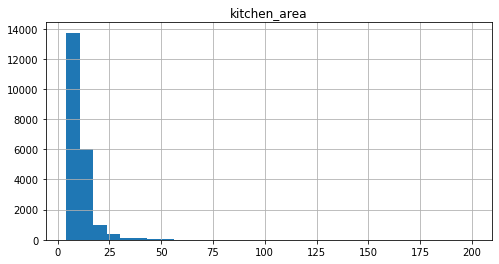

In [23]:
for c in ['total_area', 'living_area', 'kitchen_area']:
    re_data.hist(c, bins=30, figsize=(8,4), range=(4, 200)) 

Восстановим пропуски в столбцах площадь кухни и жилая площадь, медианными значениями  - вернее придется рассчитать отношение к общей площади, затем получить медианное значение и умножить медианный коэффициент на общую площадь объекта. Для того, чтобы заполнение пропусков можно было в дальнейшем устранить при анализ добавим булевый столбец is_kitchen_area_amended и is_living_area_amended.

In [24]:
# Создадим дополнительные столбцы, необходимые для выполнения поставленных аналитических задач
# и для расчета пропусков
re_data['kitchen_in_total'] = re_data['kitchen_area'] / re_data['total_area']
re_data['living_in_total'] = re_data['living_area'] / re_data['total_area']
kitchen_in_total_medina = re_data['kitchen_in_total'].median()
living_in_total_median = re_data['living_in_total'].median()
list_compare = ['kitchen_area', 'living_area']

In [25]:
def fill_na_in_area(col, col_ratio, ratio):
    col_check = 'is_' + col + '_amended'
    col_amended = col + '_amended'
    re_data[col_check] = False
    re_data[col_amended] = re_data[col]
    filter = re_data[col].isna()
    re_data.loc[filter, col_check] = True
    re_data.loc[filter, col_ratio] = ratio
    re_data.loc[filter, col_amended] = re_data.loc[filter, 'total_area'] * ratio
    print(
          'Столбец {}, исправили {} строк, старая медиана: {}, новая медиана {}'
          .format(col, filter.sum(), re_data[col].median(), re_data[col_amended].median())
          )
    
fill_na_in_area('kitchen_area', 'kitchen_in_total',  kitchen_in_total_medina)
fill_na_in_area('living_area', 'living_in_total', living_in_total_median)

Столбец kitchen_area, исправили 2278 строк, старая медиана: 9.1, новая медиана 9.0
Столбец living_area, исправили 1903 строк, старая медиана: 30.0, новая медиана 30.0


In [26]:
re_data[['kitchen_area', 'kitchen_area_amended', 'living_area', 'living_area_amended']].describe()

,kitchen_area,kitchen_area_amended,living_area,living_area_amended
count,21421.000000,23699.000000,21796.000000,23699.000000
mean,10.569807,10.491431,34.457852,34.578214
std,5.905438,6.029020,22.030445,22.340665
min,1.300000,1.300000,2.000000,2.000000
25%,7.000000,7.000000,18.600000,19.000000
50%,9.100000,9.000000,30.000000,30.000000
75%,12.000000,12.000000,42.300000,42.100000
max,112.000000,112.000000,409.700000,409.700000


Распределения для массового диапазона площадей (4, 200м) выглядят, как должны, все в порядке. Осталось проверить правило "меньше значит не больше"

In [27]:
print(compare_columns(col_whole='total_area', col_part='living_area', col_with_na='living_area'))
print(compare_columns(col_whole='total_area', col_part='kitchen_area', col_with_na='kitchen_area'))

Данные в столбце living_area не превышают total_area
Данные в столбце kitchen_area не превышают total_area


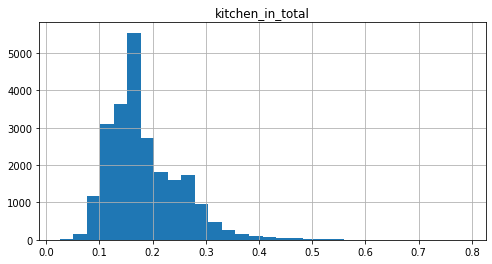

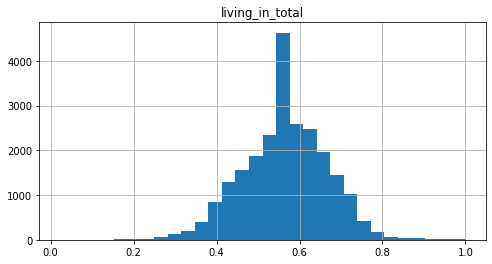

In [28]:

for c in ['kitchen_in_total', 'living_in_total']:
    re_data.hist(c, bins=30, figsize=(8,4)) 

Аномалий не видно (кроме разве что увеличения пика в р-не медианы за счет исправлений), пики сдвинуты и несимметричность пика в каждом случае повернута куда надо. Но все же рассмотрим хвосты под лупой

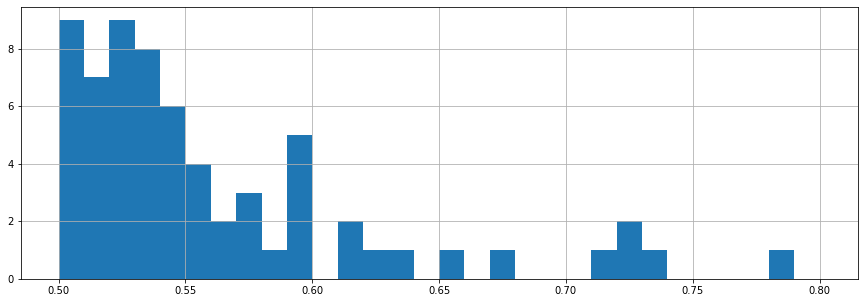

In [29]:
re_data['kitchen_in_total'].hist(figsize=(15,5), bins=30, range=(0.5, 0.8)) 

Есть десяток необычных значений (кухня/общая > 0.6), однако нет причин их как-то исправлять/помечать

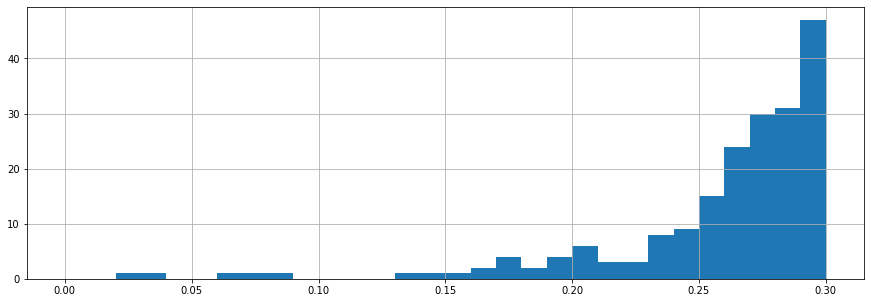

In [30]:
re_data['living_in_total'].hist(figsize=(15,5), bins=30, range=(0, 0.3)) 

Есть несколько десятков необычных значений (жилая/общая < 0.25), однако нет причин их как-то исправлять/помечать

##### Балконы

Мы уже знаем, что данные по количеству балконов имеют почти половину пропусков. Есть гипотеза - пропуск означает отсутствие балконов. Изучим данные внимательно и оценим возможность замены.

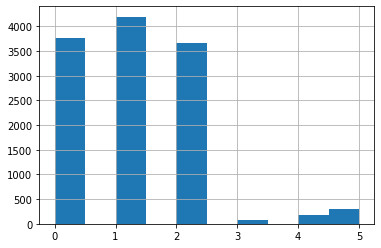

In [31]:
re_data['balcony'].hist() 

Гистограмма имеющихся данных свидетельствует о том, что явных выбросов нет. Однако по этой диаграмме невозможно судить насколько правомочно приписать все пропуски к данным с числом балконов равным 0. Создадим новый столбец balcony_amended, в котором всем пропускам присвоим значение 0. Далее будем сравнивать гистограммы на различных срезах

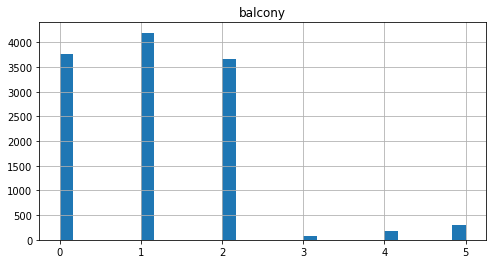

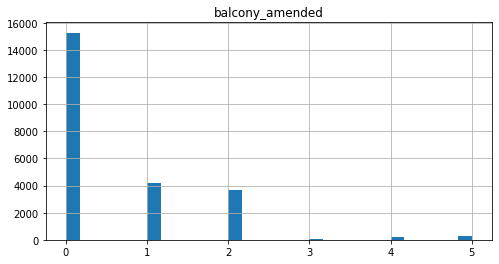

In [32]:
re_data['balcony_amended'] = re_data['balcony'].fillna(value=0).astype('int') # поскольку пропусков в новом столбце нет, можно преобразовать в более подходящий тип integer

# сначала смотрим гистограммы по всем данным
for c in ['balcony', 'balcony_amended']: 
    re_data.hist(c, bins=30, figsize=(8,4))

Город Санкт-Петрбург, площадь более 50 метров, от 0 до 3000 метров до центра. Всего объектов 555


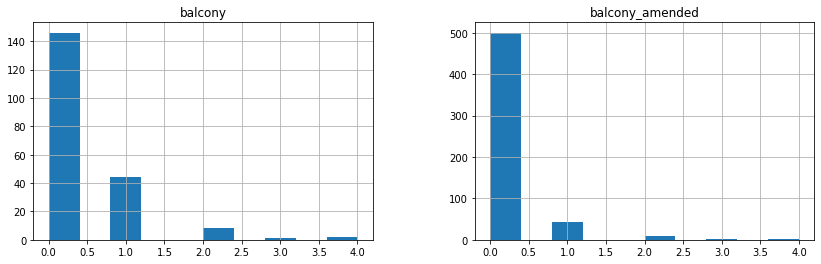

Город Санкт-Петрбург, площадь более 50 метров, от 10000 до 16000 метров до центра. Всего объектов 3934


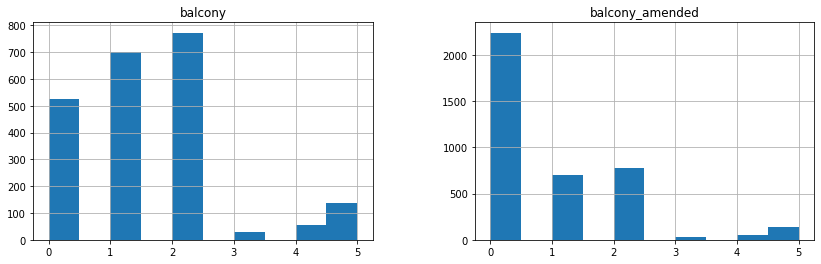

In [33]:
# а теперь посмотрим эти же гистограммы по срезам в Санкт-Петербурге: 
# сравним распределения в центре и на окраинах для объектов площадбью >50м
for dist_min, dist_max in [(0, 3000), (10000, 16000)]: 
    re_data_piter = re_data.query('locality_name == "Санкт-Петербург" and (total_area > 50)  and (@dist_min < cityCenters_nearest < @dist_max)')
    print('Город Санкт-Петрбург, площадь более 50 метров, от {} до {} метров до центра. Всего объектов {}'.format(dist_min, dist_max, len(re_data_piter)))
    re_data_piter[['balcony_amended', 'balcony']].hist(figsize=(14,4))
    plt.show()

Мы видим, что распределения по числу балконов сильно разнятся для центра и окраин, причем для окраин предлагаемое исправление принципиально меняет распределение! Что мы имеем: 
- В центре очень много исторических зданий, значительное кол-во которых вообще не имеют балконов. Распределение по кол-ву балконов в исходных данных не противоречит этому факту. Число объектов без балконов больше почти в 3 раза, чем кол-во объектов с балконами. Исправление приведет к пропорции: больше в 10 раз. Однако мы не настолько хорошо понимаем жилой фонд Санкт-Петербурга, чтобы утверждать, что именно такая пропорция характерна для центра. 
- В дальних окраинах много новостроек и мало старых зданий, в квартирах там должны быть балконы, есть, конечно, и без балконов, но количества квартир с балконами и без должны быть сопоставимы. Так и есть для исходных данных, если же заполнить пропуски нулями, окажется, что в жилых окраинах Санкт-Петербурга число квартир без балконов превышает число квартир с балконами в несколько раз! Это выглядит неправдоподобно. 
- ***Вывод: нельзя заполнять пропуски 0.*** Для дальнейшего анализа будем использовать столбец с исходными данными balcony

##### Характеристики локального местоположения.

Изучим более подробно столбцы, харакетризующие локальное местоположение объекта, то есть: airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. На этапе общего знакомства с данными мы видели, что кол-во непустых значений в расчетных столбцах - airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 - практически совпадает, около 18200 строк (скорее всего расчет производился по точным адресам, так что изначально были адреса для 18181 объектов), не пустых значений в parks_nearest, ponds_nearest значительно меньше - примерно 8000 и 9000 строк соответственно. 

Посмотрим на гистограммы в этих столбцах

airports_nearest, кол-во объектов: 18157


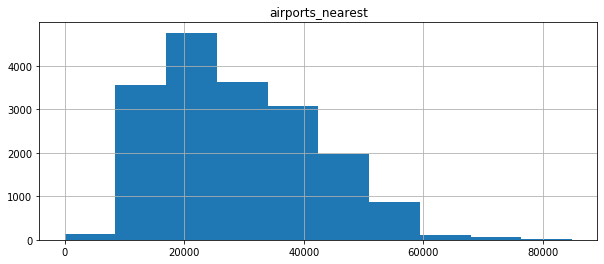

cityCenters_nearest, кол-во объектов: 18180


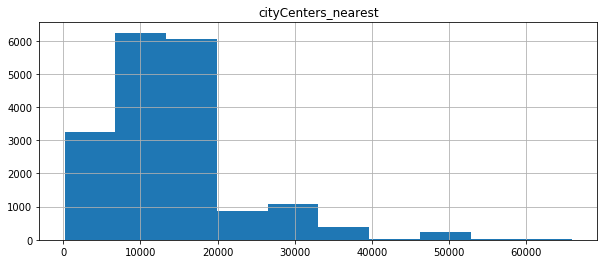

parks_around3000, кол-во объектов: 18181


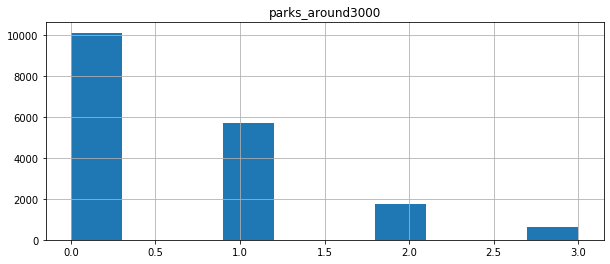

parks_nearest, кол-во объектов: 8079


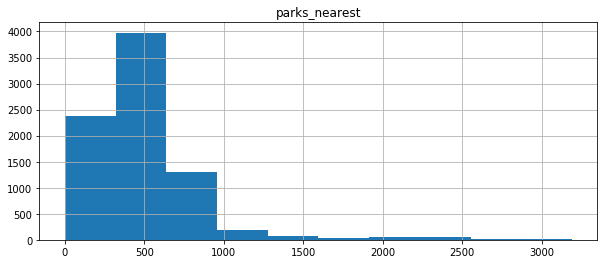

ponds_around3000, кол-во объектов: 18181


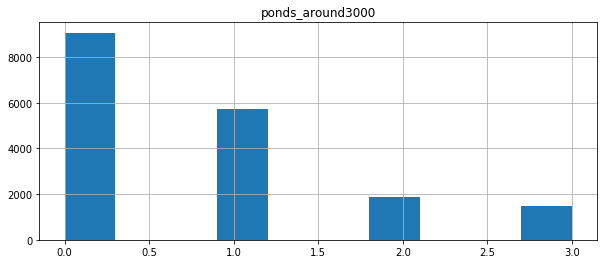

ponds_nearest, кол-во объектов: 9110


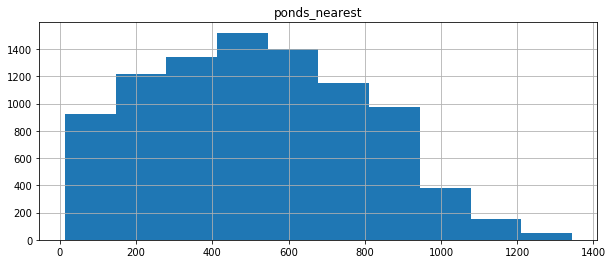

In [34]:
list_of_interest = ['airports_nearest', 
                    'cityCenters_nearest', 
                    'parks_around3000', 
                    'parks_nearest', 
                    'ponds_around3000',
                    'ponds_nearest'
                   ]
# re_data_interest = re_data[list_of_interest]
for col in list_of_interest:
    # print('Срез данных: пропуски в столбце - ', col)
    print('{}, кол-во объектов: {}'.format(col, re_data[col].count()))
    re_data.hist(col, figsize=(10,4))
    plt.show()


Изучение общих гистограмм не вызывает никаких вопросов ни с точки зрения здравого смысла, ни с точки зрения статистики. Отметим выявленные интересные факты.
- В толбце cityCenters_nearest есть локальные пики на 30 и 50 км - вероятно на этих расстояниях от центра Питера есть достаточно крупные пригородные города.
- Кол-во строк с ненулевыми данными в расчетных столбцах о наличии пруда/парка примерно соответствуют значениям в столбцах с "ручным" вводом данных. Проверим это.

In [35]:
re_data.query('parks_around3000 != 0')['parks_nearest'].count()

8075

Мы отобрали все строки, в которых parks_around3000 не равен 0. В этих же строках и значения в parks_nearest не NaN. Для дополнительной проверки посмотрим на непустые строки столбца parks_nearest там, где parks_around3000 == 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0cbce4cd0>]],
      dtype=object)

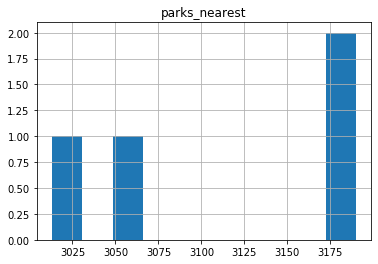

In [36]:
re_data.query('parks_around3000 == 0').hist('parks_nearest')

Все точно как в аптеке - остались только строки с данными, где расстояние более 3000 метров. Это странно - похоже, что данные в столбцах parks_nearest и ponds_nearest тоже расчетные. Проверим для прудов

In [37]:
re_data.query('ponds_around3000 != 0')['ponds_nearest'].count()

9110

Здесь просто совпадает - там и только там, где ponds_around3000 не равен 0, есть непустые значения в ponds_nearest.

Это не было очевидно из описания, но теперь мы это знаем наверняка - все столбцы, характеризующие локальное местоположение, являются расчетными, исходя из адреса объекта. И с этими данными все в порядке, заполнять пропуски не будем.

##### Дата публикации

Посмотрим гистограммы по датам первой экспозиции

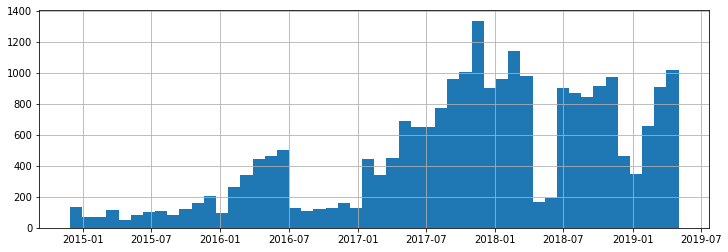

In [38]:
re_data['first_day_exposition'].hist(bins=50, figsize=(12,4))

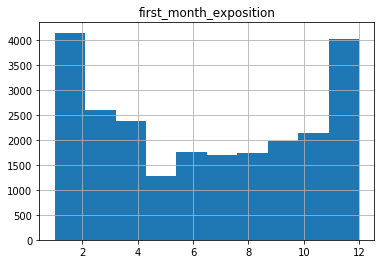

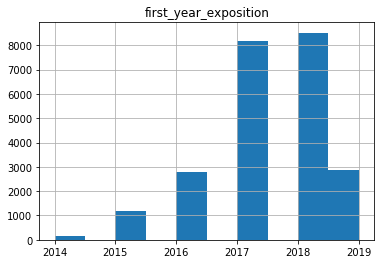

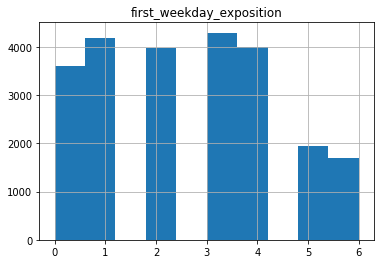

In [39]:
re_data['first_month_exposition'] = re_data['first_day_exposition'].dt.month
re_data['first_year_exposition'] = re_data['first_day_exposition'].dt.year
re_data['first_weekday_exposition'] = re_data['first_day_exposition'].dt.weekday
for c in ['first_month_exposition', 'first_year_exposition', 'first_weekday_exposition']:
    re_data.hist(c)

В базе в основном представлены объекты, выставленные на продажу в 2017 и 2018 годах, хорошо заметно изменение  сезонной активности - летом рынок затихает, в р-не Нового года активность максимальна

##### Время продажи объекта

Еще на этапе предварительного ознакомления с данными мы видели, что максимальное значение продажи квартиры составляет  1580 дней, что кажется странным. Посмотрим распределение по времени продажи более внимательно

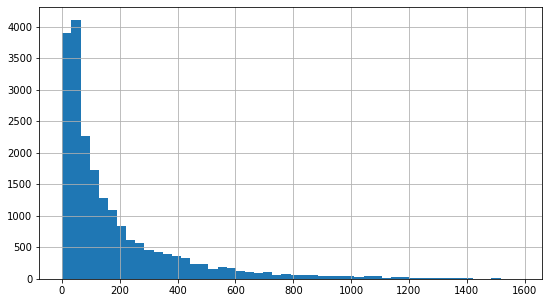

In [40]:
re_data['days_exposition'].hist(bins=50, figsize=(9,5))

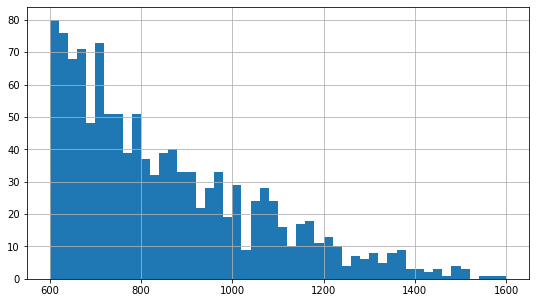

In [41]:
re_data['days_exposition'].hist(bins=50, range=(600, 1600), figsize=(9,5))

Хотя кажется невероятным, что квартира продается (или снимается с продажи) через 4,5 года, однако мы видим достаточно плавное распределение по таким 'медленным' объектам 

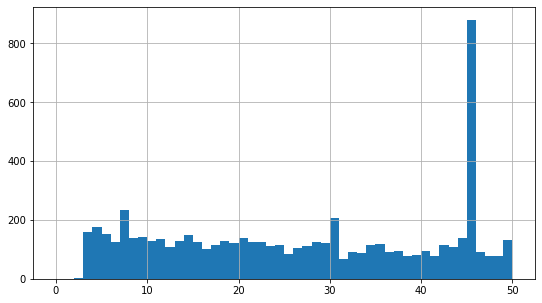

In [42]:
re_data['days_exposition'].hist(bins=50, range=(0, 50), figsize=(9,5))

Для "быстрых" объектов видим непонятный огромный пик в р-не 45 дней продажи и ряд пиков поменьше. Посмотрим на эти локальные всплески.

In [43]:
re_data['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Есть два "магических" числа - 45 и 60. Число объектов, проданных или снятых в этот день с начала экспозиции, превышают все остальные в несколько раз. Есть еще не столь очевидные всплески в 7, 30 и 90 дней. 

Для того, чтобы понять, действительно ли это аномалии, сравним с кол-вом дней, прошедших с даты первой экспозиции до даты выглрузки базы. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0cb602fd0>]],
      dtype=object)

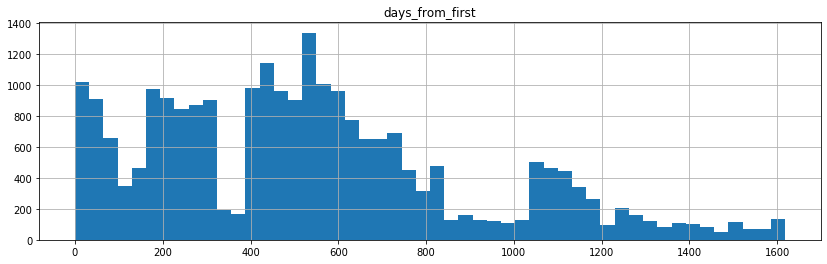

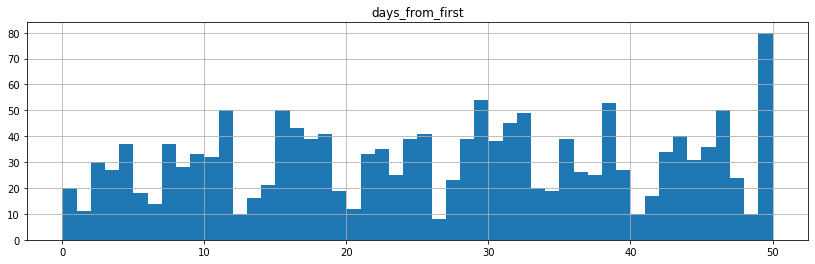

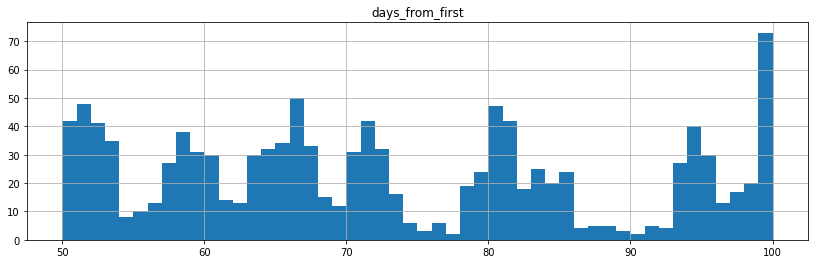

In [44]:
last_day_data = re_data['first_day_exposition'].max()
re_data['days_from_first'] = last_day_data - re_data['first_day_exposition']
re_data['days_from_first'] = re_data['days_from_first'].dt.days
# мы создали новый столбец, где созранили кол-во дней между первой датой экспозиции объекта и датой выгрузки базы

# посмотрим гистограмму в новом столбце вообще и для интересующего нас диапазона от 0 до 100
re_data.hist('days_from_first', bins=50, figsize=(14,4))
re_data.hist('days_from_first', bins=50, range=(0,50), figsize=(14,4))
re_data.hist('days_from_first', bins=50, range=(50,100), figsize=(14,4))

Гистограмма кол-ва объектов, выставленных в промежутке от 100 до 0 дней до выгрузки не демонстрирует каких-то особенных пиков. Есть заметное "биение" на уровне кратном 7, очевидно, отражающее активность продавцов в зависимости от дня недели (мы это видели на гистограмме "день недели"). Так что локальным пикам, кратным 7, хоть какое-то объяснение есть (хотя это объяснение предполагает пики длиной  в несколько дней), во всяком случае в первом приближении такое объяснение позволяет не считать пик на 7 днях аномальным.

Что касается пиков больших - на уровне 45, 60, и пиков поменьше - на уровне 30 и 90, то они никак не объясняются.

Попробуем все же посмотреть много ли вообще объектов, срок экспозиции у которых совпадает с полученным нам сроком - кол-во дней между датой начала экспозиции объекта и датой выгрузки базы

In [45]:
# ясно, что days_from_first минус days_exposition должно быть больше или равно 0
re_data['days_not_exposing'] = re_data['days_from_first'] - re_data['days_exposition'] 

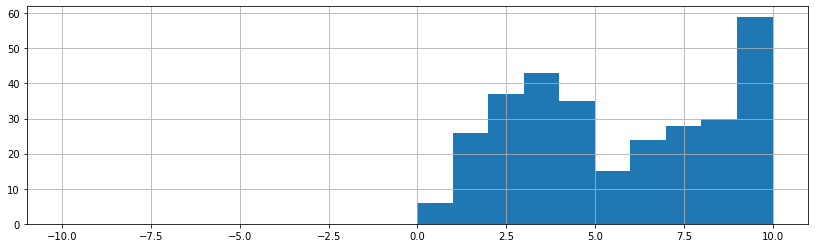

In [46]:
# смотрим распределение около 0
re_data['days_not_exposing'].hist(range=(-10, 10), bins=20, figsize=(14,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0cc031e10>]],
      dtype=object)

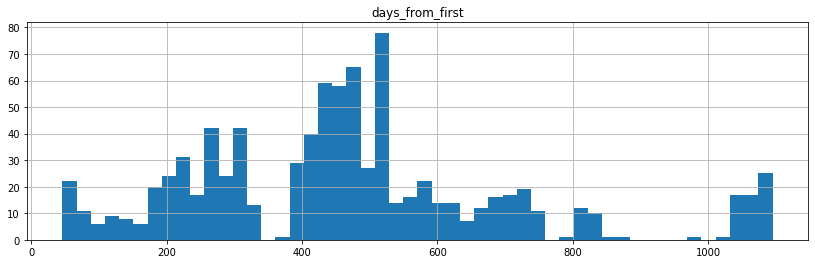

In [47]:
# посмотрим еще на гистограмму  days_from_first на срезе days_exposition == 45, самого большого аномального пика
re_data.query('days_exposition > 44.999 and days_exposition < 45.001').hist('days_from_first', bins=50,  figsize=(14,4))

Мы не обнаружили никаких данных, позволяющих объяснить аномальные пики days_exposition за счет тех объектов, которые не были проданы и оставались в базе на момент выгрузки.

Возможно ли, что пики days_exposition связаны с регламентом работы той службы, откуда мы получили данные - например, после 45 дней требуется оплатить объявление или что-то в этом роде ? Посмотрим распределение по срокам продажи/экспозиции в самом "массовом" диапазоне

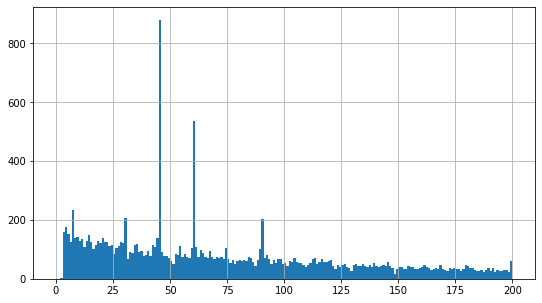

In [48]:
# еще раз посмотрим на пики
re_data['days_exposition'].hist(bins=200, range=(0, 200), figsize=(9,5))

Всплески в выявленных нами точках 30 и 90 дней не выглядят такими уж аномальными, как в "магических" сроках  45 и 60, тем не менее и они, скорее всего, неслучайны. С учетом самих значений сроков, где мы наблюдаем аномалии - 30 дней это "месяц для ровного счета" - я считаю, что эти всплески определяются регламентом сервиса, откуда получены данные, и, значит, они, в основном, не результат продажи объекта, а результат снятия объекта с продажи из-за регламента сервиса. 
Можно ли попытаться улучшить данные, например, просто заменить в рукотворных пиках сроки на средний или медианный? Не вполне корректно. К примеру, почти 900 объектов были сняты с продажи через 45 дней. У этих объектов не может быть среднее или медиана равна средней или медиане по всей базе. Ведь эти объекты точно не были проданы за 45 дней. Разумным выглядит следующий способ. Берем значение срока, где аномальный срок экспозиции. Считаем медиану по всем данным, в которых срок больше. Присваиваем всем аномальным данным полученную медиану. Так делаем по всем пикам, двигаясь от больших сроков к меньшим. Исключим из обработки пик на 7 днях. Он все же в меньшей степени выделяется от окружающих данных и, возможно, обусловлен другими причинами - например, с недельной активностью выставления объекта или связан с характерным временем реакции агентов рынка на обновление базы

In [49]:
old_peaks_list = [90.0, 60.0, 45.0, 30.0] 
new_peaks_list = []
rows_amended = 0
re_data['days_exposition'] = re_data['days_exposition'].round(0) # округляем, чтобы float можно было сравненивать
re_data['days_exposition_amended'] = re_data['days_exposition'] 

for threshold in old_peaks_list: 
    new_value = re_data.query('days_exposition_amended > @threshold')['days_exposition_amended'].median()
    new_peaks_list.append(new_value)
    filter = re_data['days_exposition_amended'] == threshold
    rows_amended += filter.sum()
    filter = ~filter
    re_data['days_exposition_amended'] = re_data['days_exposition_amended'].where(filter, new_value)

print('Всего строк, в которых изменили данные', rows_amended)
print('Список старых "неправильных" пиков', old_peaks_list)
print('Список новых "правильных" пиков   ', new_peaks_list)

Всего строк, в которых изменили данные 1830
Список старых "неправильных" пиков [90.0, 60.0, 45.0, 30.0]
Список новых "правильных" пиков    [224.0, 188.0, 179.0, 172.0]


In [50]:
re_data['days_exposition_amended'].value_counts().head(10)

179.0    927
188.0    569
172.0    246
7.0      234
224.0    223
4.0      176
3.0      158
5.0      152
14.0     148
9.0      143
Name: days_exposition_amended, dtype: int64

Мы фактически "выпилили" локальные пики, создав другие

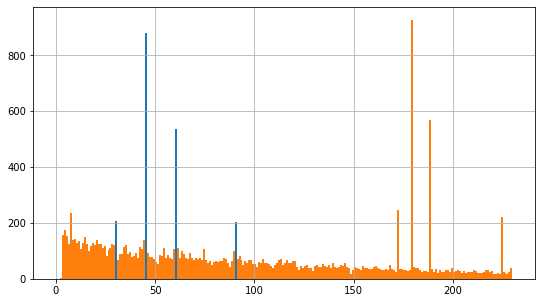

In [51]:
re_data['days_exposition'].hist(bins=230, range=(0, 230), figsize=(9,5))
re_data['days_exposition_amended'].hist(bins=230, range=(0, 230), figsize=(9,5))

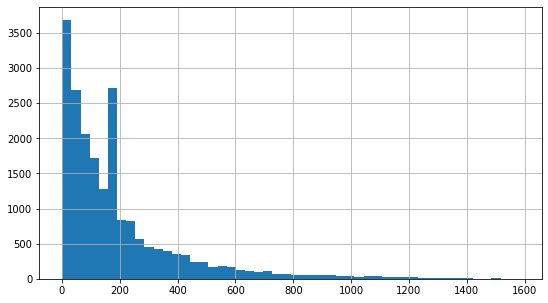

In [52]:
re_data['days_exposition_amended'].hist(bins=50, figsize=(9,5))

Распределение по времени экспозиции в редактированных данных стало выглядеть даже хуже, чем в изначальных. Однако я не буду пытаться "замаскировать" вмешательство (можно было бы заменить данные не одним каким-то характерным значением, а распределением). Редактированные данные, на мой взгляд, в бОльшей степени характеризуют ожидаемое время продажи объекта, а не просто экспозиции.

In [53]:
re_data[['days_exposition','days_exposition_amended']].describe()

,days_exposition,days_exposition_amended
count,20518.000000,20518.000000
mean,180.888634,192.763866
std,219.727988,216.036895
min,1.000000,1.000000
25%,45.000000,48.000000
50%,95.000000,130.000000
75%,232.000000,232.000000
max,1580.000000,1580.000000


Я пришел к выводу, что в исходных данных есть искажение, связанное с регламентов работы сервиса, предоставившего данные. Я посчитал, что сроки экспозиции в 30, 45, 60 и 90 дней содержат в основном данные о снятых с продажи объектах, а не о проданных объектах. Я заменил сроки с такими значениями на более вероятные сроки продаж объектов. Все редактированные данные были размещены в новом столбце - days_exposition_amended. Я считаю, что в этом столбце данные в бОльшей степени отражают сроки продажи объекта

- Характерное время продажи квартиры в Санкт-Петербурге и пригородах находится в диапазоне 130-193 дня, от 4 до 6 месяцев.
- "Быстрые" продажи происходят за 1.5 месяца (менее 48 дней)
- "Медленные" продажи длятся более почти 8 месяцев (более 232 дней) вплоть до нескольких лет

***Примечание.*** Я сделал выводы по характерным срокам на основе редактированных данных, посчитав, что некоторые аномальные данные вызваны регламентом работы сервиса, предоставившего эти данные. Редактированные данные сильно отличаются от исходных. Прежде чем основывать выводы на редактированных, а не исходных данных, необходимо, конечно, проанализировать регламент работы сервиса. Только в случае обнаружения в регламенте условий, подтвверждающих мои выводы на основе анализа, можно полагаться на редактированные данные. Сейчас такой возможности нет, поэтому для сравнения представлены характерные времена и для исходных данных.

##### Стоимость объекта, расчет стоимости квадратного метра.

Мы уже ознакомились с данными по площади объекта и убедились, что с ними все в порядке. Прежде чем рассчитать  стоимость квадратного метра, посмотрим на распределение по стоимости объекта внимательнее.

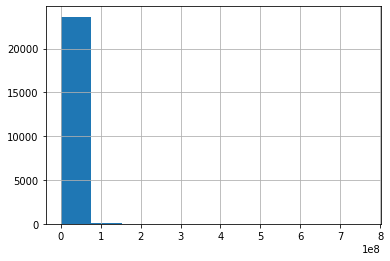

In [54]:
re_data['last_price'].hist()

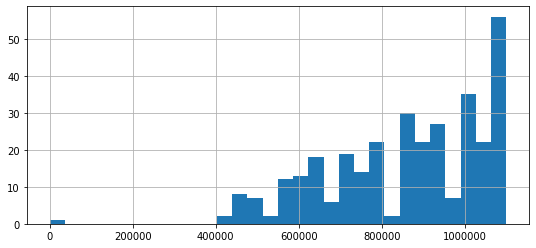

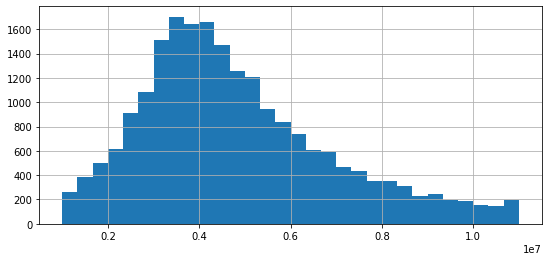

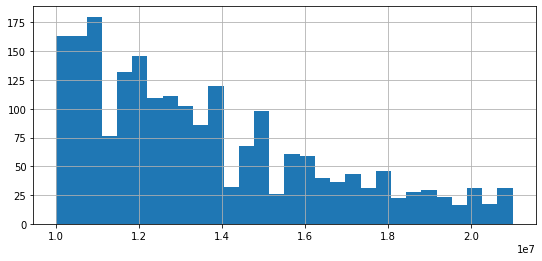

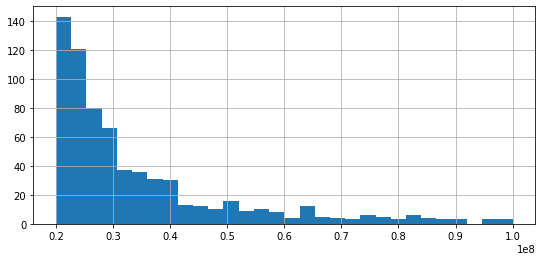

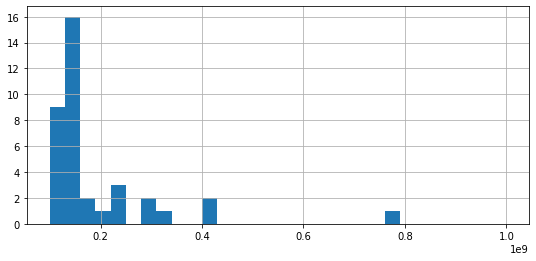

In [55]:
# Есть очень дорогие объекты, которые делают общую диаграмму бесполезной, посмотрим распределение в разных диапазонах
low = [0, 10, 100, 200, 1000]
high = [11, 110, 210, 1000, 10000]
multiple = 100000 # создадим границы диапазонов через множитель, чтобы не запутаться в нулях
range = [[multiple*l, multiple*h] for (l,h) in zip(low, high)] 
for p_min, p_max in range:
    re_data['last_price'].hist(bins=30, figsize=(9,4), range=(p_min, p_max))
    plt.show()

Я не вижу аномальных данных для дорогих объектов. Аномальность есть только среди дешевых, причем это единственный объект. Посмотрим на него

In [56]:
re_data.query('last_price < 50000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_amended,is_living_area_amended,living_area_amended,balcony_amended,first_month_exposition,first_year_exposition,first_weekday_exposition,days_from_first,days_not_exposing,days_exposition_amended
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,40.5,False,32.0,0,3,2019,2,44,36.0,8.0


Двухкомнатная квартира 109 метров общей площади с нормальными потолками на 25 этаже 25-этажного дома стоит 12 тыс руб. ? Это явная ошибка. Забыли 3 нуля. Посмотрим полную информацию о квартире

In [57]:
filter = re_data['last_price'] < 200000
re_data.loc[filter]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area_amended,is_living_area_amended,living_area_amended,balcony_amended,first_month_exposition,first_year_exposition,first_weekday_exposition,days_from_first,days_not_exposing,days_exposition_amended
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,40.5,False,32.0,0,3,2019,2,44,36.0,8.0


Квартира в Санкт-Петербурге, новостройка, просторная, с огромной кухней. Надо либо удалить эту квартиру, либо пометить запись, как ошибочную, либо исправить значение. Мы уже встречали необычные данные, но явных ошибок не находили. Создавать столбец для пометки ошибочных данных правильно, но не для единственной записи. Удалять запись не хочется, поэтому сделаем очевидное исправление: поменяем 12190 на 12190000 

In [58]:
re_data['is_row_amended'] = False
re_data.loc[filter, 'last_price'] = re_data.loc[filter, 'last_price'] * 1000
re_data.loc[filter, 'is_row_amended'] = True
re_data.loc[filter]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,is_living_area_amended,living_area_amended,balcony_amended,first_month_exposition,first_year_exposition,first_weekday_exposition,days_from_first,days_not_exposing,days_exposition_amended,is_row_amended
8793,7,12190000.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,False,32.0,0,3,2019,2,44,36.0,8.0,True


Все остальные данные не вызывают вопросов. Можно приступить к расчету стоимости квадратного метра

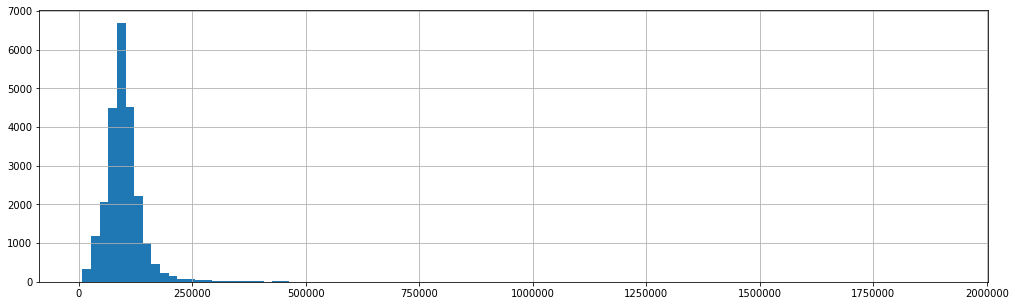

In [59]:
re_data['price_meter'] = re_data['last_price'] / re_data['total_area'] # рассчитаем стоимость одного 1 кв метра
re_data['price_meter'].hist(bins=100, figsize=(17,5))

Общий вид распределение соответствует ожиданиям. Посмотрим на самые дешевые и самые дорогие метры

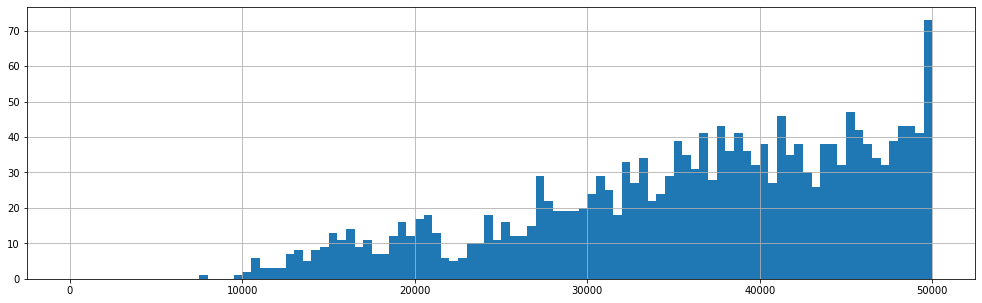

In [60]:
re_data['price_meter'].hist(bins=100, range=(0,50000), figsize=(17,5))

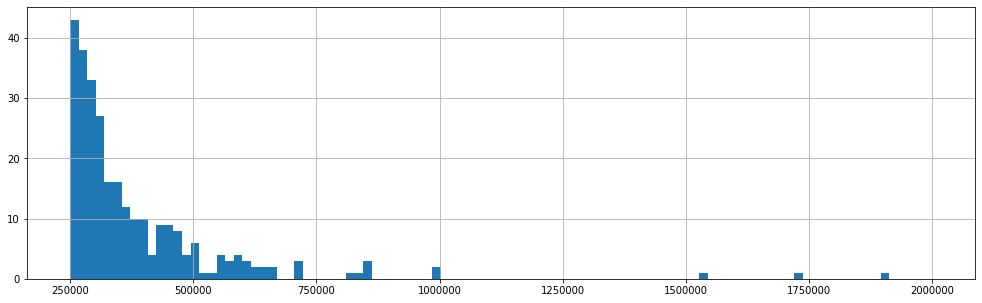

In [61]:
re_data['price_meter'].hist(bins=100, range=(250000,2000000), figsize=(17,5))

Видно, что есть одиночные объекты дешевле 10 000 руб/м и дороже примерно 700 000 руб/м. Нельзя сказать, что это какие-то ошибочные данные, возможно, скорее всего они представляют собой уникальные объекты. В любом случае, данных в этих хвостах мало, их будет недостаточно для статистически оправданных выводов. Мы не будем совсем отбрасывыть такие данные, просто разметим все данные, как 'rare cheap', 'normal' и 'rare expensive', чтобы  учитывать их отдельно в анализе. Посмотрим возле границ, чтобы можно было более четко их определить.

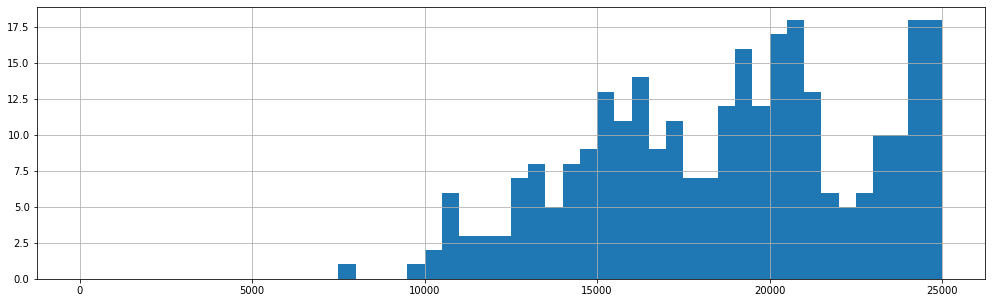

In [62]:
re_data['price_meter'].hist(bins=50, range=(0,25000), figsize=(17,5))

In [63]:
low_margin = 10000 #Определяем нижнюю границу на уровне 10000 руб/м

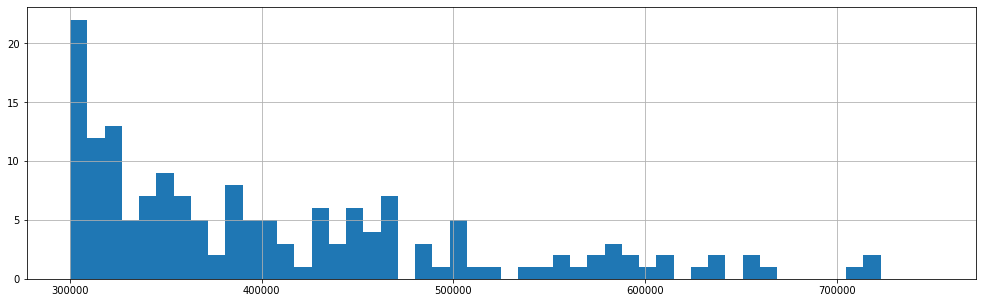

In [64]:
re_data['price_meter'].hist(bins=50, range=(300000,750000), figsize=(17,5))

In [65]:
high_margin = 400000 # Определяем верхнюю границу на уровне 400 тыс. руб/м.
# Итак, данные для нашего анализа находятся в диапазоне между 12500 и 500000 руб/м. Посмотрим на них

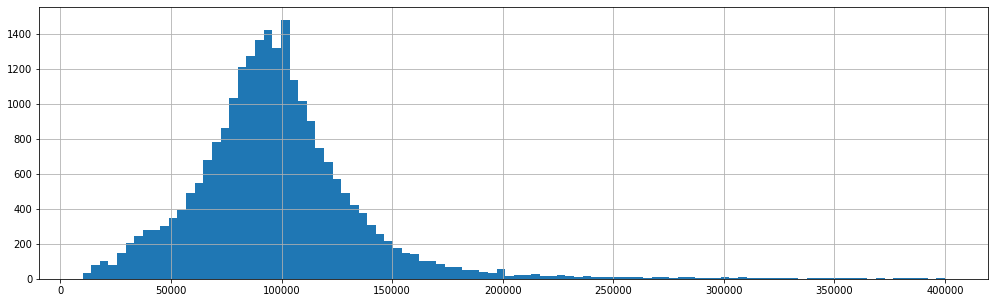

In [66]:
re_data['price_meter'].hist(bins=100, range=(low_margin, high_margin), figsize=(17,5))

Видны небольшие пики на вполне себе колоколообразной кривой и сама форма пика в р-не 100тыс руб/м не симметрична. Однако я пока не вижу повода для беспокойства. Скорее всего пикы связаны с природой ценообразования - живые люди определяют цену на свои объекты, некоторые при этом ориентируются на стоимость квадратного метра, с учетом того, что мышление в отношении цен дискретно, вполне логичен небольшой пик в р-не 200 тыс./руб. за метр. и всплеск в р-не 100 тыс./руб. за метр

In [67]:
return_frequency = lambda price: 'rare cheap' if price < low_margin else ('normal' if price <= high_margin else 'rare expensive') 
re_data['frequency'] = re_data['price_meter'].apply(return_frequency)
re_data['frequency'] = re_data['frequency'].astype('category') # обязательно преобразуем в category
re_data['frequency'].value_counts()

normal            23619
rare expensive       78
rare cheap            2
Name: frequency, dtype: int64

In [68]:
# Посмотрим другие характеристики "редких" объекты
re_data.query('frequency == "rare cheap"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_amended,first_month_exposition,first_year_exposition,first_weekday_exposition,days_from_first,days_not_exposing,days_exposition_amended,is_row_amended,price_meter,frequency
4405,9,500000.0,52.0,2018-08-02,2,2.7,2.0,31.0,1,NaN,...,0,8,2018,3,274,164.0,110.0,False,9615.384615,rare cheap
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,NaN,3,NaN,...,0,6,2018,1,311,267.0,44.0,False,7962.962963,rare cheap


In [69]:
re_data.query('frequency == "rare expensive"').sort_values(by='price_meter', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_amended,first_month_exposition,first_year_exposition,first_weekday_exposition,days_from_first,days_not_exposing,days_exposition_amended,is_row_amended,price_meter,frequency
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,NaN,...,2,9,2017,5,580,547.0,33.0,False,1.907500e+06,rare expensive
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,NaN,...,0,4,2018,2,394,161.0,233.0,False,1.736842e+06,rare expensive
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,NaN,...,0,3,2019,1,45,NaN,NaN,False,1.542605e+06,rare expensive
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,3,2,2016,5,1168,775.0,393.0,False,1.000748e+06,rare expensive
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.2,2,False,...,0,10,2017,3,568,523.0,179.0,False,9.959839e+05,rare expensive


Итак, я нашел единственный объект с ошибочной общей стоимостью. Ошибку исправил.
Я выделил менее 100 редких объектов - очень дешевых или очень дорогих. Я не вижу причин считать их ошибочными. Я пометил все такие объекты, чтобы в дальнейшем учитывать, что статистики для таких объектов слишком мало.

##### Число комнат

Мы уже знаем, что столбец, характеризующий число комнат в объекте, представлен без пропусков. По квартилям, мин/макс и среднему нет серьезных отклонений. Максимальное значение равно 19, что вполне возможно, учитывая максимальную площадь. Есть как минимум один объект с кол-вом комнат = 0, чего, исходя из здравого смысла, не должно быть. Посмотрим распределение данных.

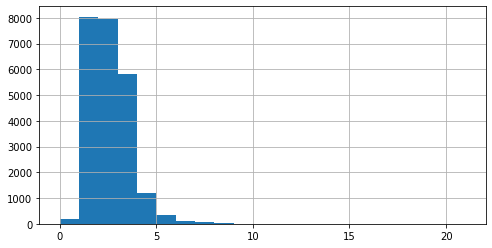

In [70]:
re_data['rooms'].hist(bins=21, range=(0,21), figsize=(8,4))

In [71]:
# Столбец с числом комнат имеет вполне обозримое кол-во разных значений, поэтому можно и просто посчитать частотность
re_data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Тепер видим, что есть всего 197 объектов с числом комнат = 0 .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0ca313e10>,
      dtype=object)

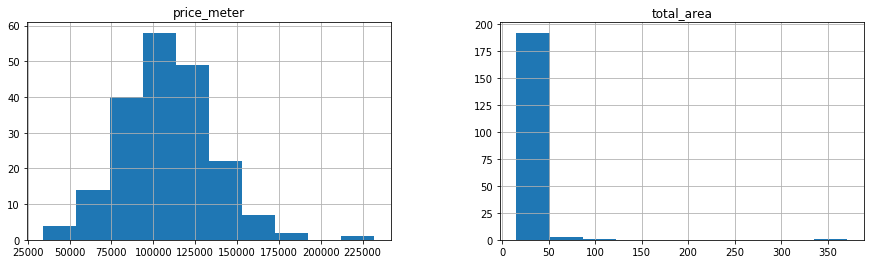

In [72]:
re_data.query('rooms == 0')[['total_area', 'price_meter']].hist(figsize=(15,4))

Я не вижу аномалий в распределении данных по комнатам. Есть 197 объектов с кол-вом комнат, равным 0. В основном, эти объекты имеют небольшую площадь (до 50м), хотя этот факт мало о чем говорит, так как в базе подавляющее число объектов имеют площадь между 35 и 50 метрами, как мы видели при изучении столбца total_area. Распределение по стоимости квадратного метра таких необычных объектов соответствует распределению по стоимости во всей базе. Возможно, это ошибка при вводе данных, возможно, это отражает тот факт, что продается не отдельная квартира, а комната. Мы оставим эти данные неизменными и не будем никак дополнительно их помечать.

Я выбрал следующую стратегию - если диаграмма размаха предлагает исключить из анализа слишком много хороших, с моей точки зрения, данных, я считаю соотв. границу отсечки не по диаграмме размаха, а по процентилю. Для удаления данных из анализа я буду помечать все такие данные в boolean столбце is_rare

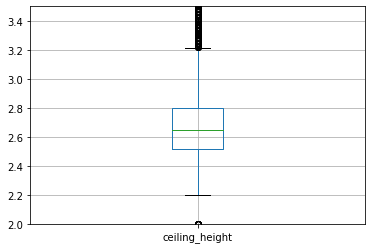

In [73]:
list_col_interest = ['ceiling_height', 'rooms', 'total_area', 'price_meter', 'kitchen_in_total', 'living_in_total']
plt.ylim(2, 3.5)
re_data.boxplot(column=list_col_interest[0])

Мы уже внимательно изучали высоту потолков и сделали вывод о редких значениях. Определенная нами граница для уникально больших потолков существенно выше, чем предлагаемая диаграммой размаха. Оценим хвосты еще раз

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0ca1e5410>]],
      dtype=object)

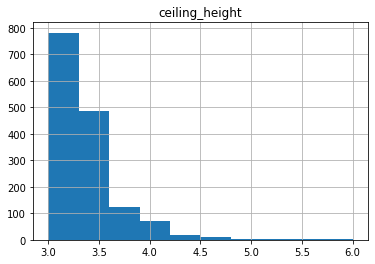

In [74]:
filter = re_data[list_col_interest[0]] > 3
re_data[filter].hist(list_col_interest[0], range=(3,6))

In [75]:
re_data[list_col_interest[0]].quantile(q=0.99)

3.829699999999993

Как мне кажется, если считать по верхней границе в диаграмме размаха,  мы отсечем слишком много строк для анализа, оставляя за бортом анализа целую категорию квартир с очень высокими потолками, поэтому я решил увеличить верхнуюю границу отсечения, выбросив только 1%

In [76]:
re_data['is_rare'] = False # создаем столбец в котором будем помечать все редкие данные

In [77]:
def mark_as_rare(col, value_min, value_max): # создаем функцию для пометки редких значений
    filter = (re_data[col] > value_max) | (re_data[col] < value_min)
    re_data.loc[filter, 'is_rare'] = True
    return filter.sum()

In [78]:
print(re_data['is_rare'].sum(), ' + ', mark_as_rare('ceiling_height', 2.2, 3.83), ' = ', re_data['is_rare'].sum())

0  +  159  =  159


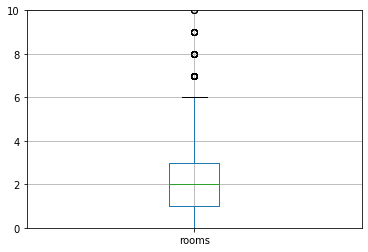

In [79]:
plt.ylim(0, 10)
re_data.boxplot(column=list_col_interest[1])

In [80]:
re_data[list_col_interest[1]].quantile(q=0.99)

5.0

In [81]:
# Здесь диаграмма размаха предлагает даже более мягкие условия, возьмем их

print(re_data['is_rare'].sum(), ' + ', mark_as_rare('rooms', 0, 6), ' = ', re_data['is_rare'].sum())

159  +  90  =  242


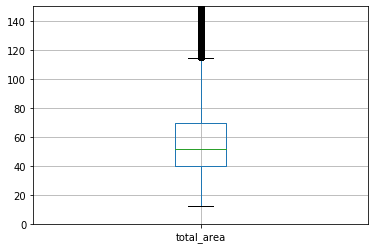

In [82]:
plt.ylim(0, 150)
re_data.boxplot(column=list_col_interest[2])

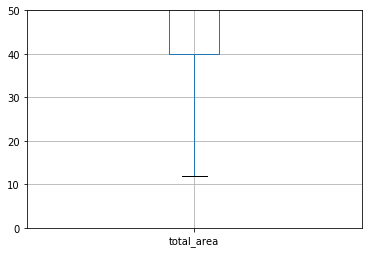

In [83]:
plt.ylim(0, 50)
re_data.boxplot(column=list_col_interest[2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0ca290350>]],
      dtype=object)

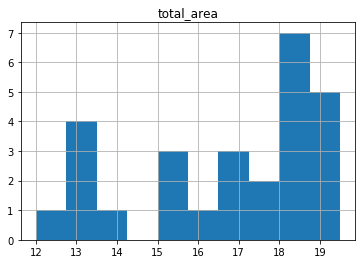

In [84]:
filter = re_data[list_col_interest[2]] < 20
re_data[filter].hist(list_col_interest[2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9fdb850>]],
      dtype=object)

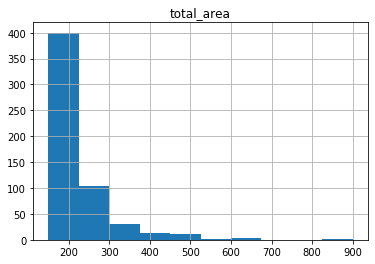

In [85]:
filter = re_data[list_col_interest[2]] > 150
re_data[filter].hist(list_col_interest[2])

In [86]:
re_data[list_col_interest[2]].quantile(q=0.99)

197.2140000000003

In [87]:
# установим фильтр для площадей на 17 - 200 м
print(re_data['is_rare'].sum(), ' + ', mark_as_rare('total_area', 17, 200), ' = ', re_data['is_rare'].sum())


242  +  237  =  392


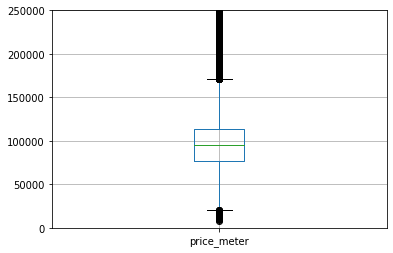

In [88]:
plt.ylim(0, 250000)
re_data.boxplot(column=list_col_interest[3])

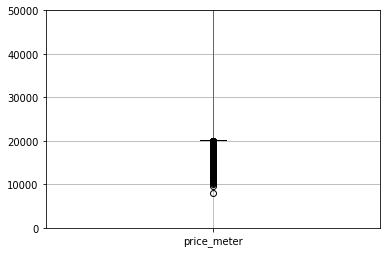

In [89]:
plt.ylim(0, 50000)
re_data.boxplot(column=list_col_interest[3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9ea4750>]],
      dtype=object)

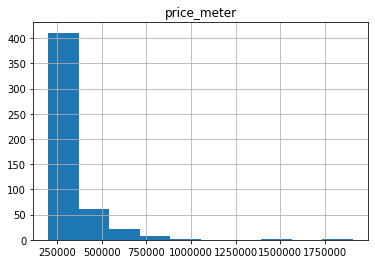

In [90]:
filter = re_data[list_col_interest[3]] > 200000
re_data[filter].hist(list_col_interest[3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9d487d0>]],
      dtype=object)

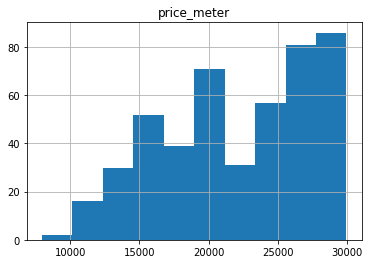

In [91]:
filter = re_data[list_col_interest[3]] < 30000
re_data[filter].hist(list_col_interest[3])

In [92]:
# верхний уровень отсечки по цене также определим процентилем
re_data[list_col_interest[3]].quantile(q=0.99)

266806.77568917174

In [93]:
# установим фильтр для больших на 267000 руб/м, для маленьких положимся на диаграмму размаха
print(re_data['is_rare'].sum(), ' + ', mark_as_rare('price_meter', 20000, 267000), ' = ', re_data['is_rare'].sum())

392  +  405  =  736


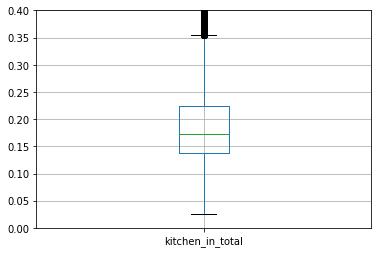

In [94]:
plt.ylim(0, 0.4)
re_data.boxplot(column=list_col_interest[4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9c8fb10>]],
      dtype=object)

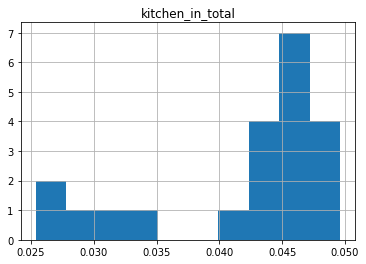

In [95]:
filter = re_data[list_col_interest[4]] < 0.05
re_data[filter].hist(list_col_interest[4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9c4f710>]],
      dtype=object)

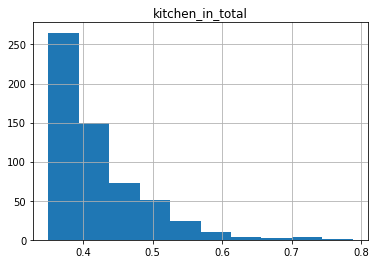

In [96]:
filter = re_data[list_col_interest[4]] > 0.35
re_data[filter].hist(list_col_interest[4])

In [97]:
# верхний уровень отсечки по площади кухни также определим процентилем
re_data[list_col_interest[4]].quantile(q=0.99)

0.4166807909604523

In [98]:
# установим фильтр для больших на 0.42
print(re_data['is_rare'].sum(), ' + ', mark_as_rare('kitchen_in_total', 0.04, 0.42), ' = ', re_data['is_rare'].sum())

736  +  231  =  941


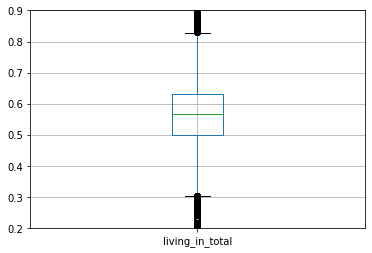

In [99]:
plt.ylim(0.2, 0.9)
re_data.boxplot(column=list_col_interest[5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9b1b350>]],
      dtype=object)

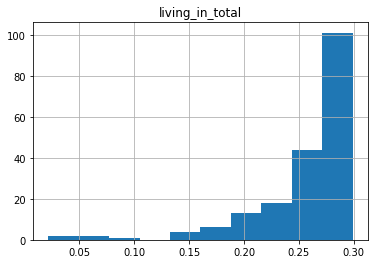

In [100]:
filter = re_data[list_col_interest[5]] < 0.3
re_data[filter].hist(list_col_interest[5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c9a5c3d0>]],
      dtype=object)

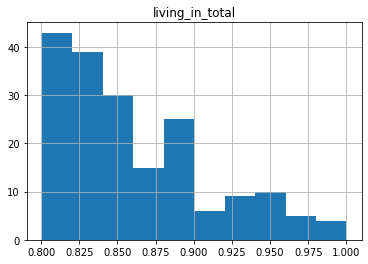

In [101]:
filter = re_data[list_col_interest[5]] > 0.8
re_data[filter].hist(list_col_interest[5])

In [102]:
re_data[list_col_interest[5]].quantile(q=0.99)

0.789478201942625

In [103]:
# установим фильтр 0.25-0.85
print(re_data['is_rare'].sum(), ' + ', mark_as_rare('living_in_total', 0.25, 0.85), ' = ', re_data['is_rare'].sum())

941  +  140  =  1040


**Итак, мы пометили 1040 квартир как редкие.** Отбрасывать такие квартиры при анализе мы будем с помощью фильтра по созданнму столбцу ~re_data.is_rare

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

##### Зависимость стоимости квартир от локации

In [104]:
# сформируем список локаций, в которых у нас максимальное кол-во выставленных объектов
localities_list_max_objects = re_data.groupby('locality_name')['price_meter'].count().sort_values(ascending=False).head(10)

# сформиуем сначала вспомогательные таблицы, в которые соберем данные по кол-ву редких и аномальных объектов
pivot_loc_max_ceilings = (
    re_data
    .query('locality_name in @localities_list_max_objects.index')
    .pivot_table(index='locality_name',
                 columns='ceiling_category',
                 values='price_meter',
                 aggfunc='count',
                 fill_value=0
                )
)
pivot_loc_max_ceilings = pivot_loc_max_ceilings[['10м - 100м', 'до 2.2м']]
pivot_loc_max_ceilings

ceiling_category,10м - 100м,до 2.2м
locality_name,,
Всеволожск,0,1
Выборг,0,2
Гатчина,1,0
Колпино,0,0
Пушкин,0,0
Санкт-Петербург,15,4
деревня Кудрово,0,0
посёлок Мурино,2,0
посёлок Парголово,0,0


In [105]:
pivot_loc_max_frequency = (
    re_data
    .query('locality_name in @localities_list_max_objects.index')
    .pivot_table(index='locality_name',
                 columns='frequency',
                 values='price_meter',
                 aggfunc='count',
                 fill_value=0
                )
)
pivot_loc_max_frequency = pivot_loc_max_frequency[['rare expensive']]
pivot_loc_max_frequency

frequency,rare expensive
locality_name,
Всеволожск,1
Выборг,0
Гатчина,0
Колпино,0
Пушкин,0
Санкт-Петербург,77
деревня Кудрово,0
посёлок Мурино,0
посёлок Парголово,0


In [106]:
pivot_loc_max_objects = (
    re_data
    .query('locality_name in @localities_list_max_objects.index')
    .pivot_table(index='locality_name', 
                 values='price_meter', 
                 aggfunc=['median', 'mean', 'count']
                )
)
pivot_loc_max_objects.columns = [ 'руб/м, медиана', 'руб/м, среднее', 'всего квартир' ]
pivot_loc_max_objects['руб/м, среднее'] = pivot_loc_max_objects['руб/м, среднее'].round(1)
pivot_loc_max_objects['руб/м, медиана'] = pivot_loc_max_objects['руб/м, медиана'].round(1)
pivot_loc_max_objects.sort_values(by='руб/м, медиана', ascending=False, inplace=True)
pivot_loc_max_objects

,"руб/м, медиана","руб/м, среднее",всего квартир
locality_name,,,
Санкт-Петербург,104770.3,114856.1,15721
Пушкин,100000.0,103125.8,369
деревня Кудрово,91860.5,92473.5,299
посёлок Парголово,91642.9,90175.9,327
посёлок Мурино,85878.5,85752.2,522
посёлок Шушары,76876.2,78677.4,440
Колпино,74723.7,75424.6,338
Гатчина,67796.6,68746.1,307
Всеволожск,65789.5,68654.5,398


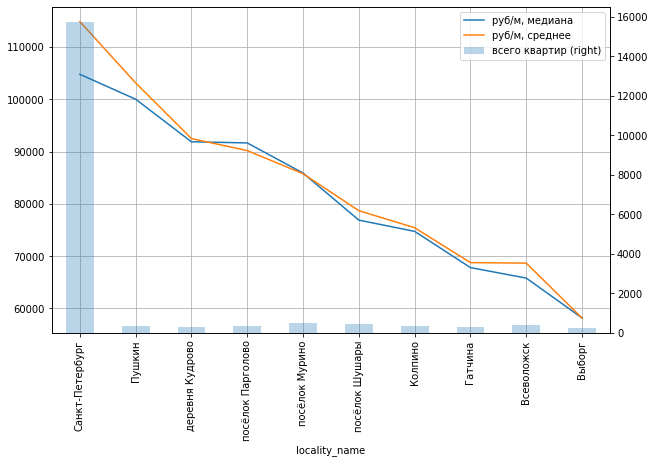

In [107]:
ax = pivot_loc_max_objects.plot(y='руб/м, медиана', figsize=(15,6), grid=True)
pivot_loc_max_objects.plot(y='руб/м, среднее', ax=ax, figsize=(15,6), grid=True)
pivot_loc_max_objects.plot(y='всего квартир', kind='bar', alpha=0.3, figsize=(10,6), ax=ax, secondary_y=True, grid=True)

In [108]:
# теперь соединим все сводные таблицы в одну
show_1 = pivot_loc_max_objects.join(pivot_loc_max_frequency)
pivot_loc_max_objects_show = show_1.join(pivot_loc_max_ceilings)
pivot_loc_max_objects_show

,"руб/м, медиана","руб/м, среднее",всего квартир,rare expensive,10м - 100м,до 2.2м
locality_name,,,,,,
Санкт-Петербург,104770.3,114856.1,15721,77,15,4
Пушкин,100000.0,103125.8,369,0,0,0
деревня Кудрово,91860.5,92473.5,299,0,0,0
посёлок Парголово,91642.9,90175.9,327,0,0,0
посёлок Мурино,85878.5,85752.2,522,0,2,0
посёлок Шушары,76876.2,78677.4,440,0,0,0
Колпино,74723.7,75424.6,338,0,0,0
Гатчина,67796.6,68746.1,307,0,1,0
Всеволожск,65789.5,68654.5,398,1,0,1


- Самая дорогие квартиры в Санкт-Петербурге и Пушкине, средняя стоимость квадратного метра в них примерно на 15% и 10%  больше ближайших конкурентов - поселки Кудрово и  Парголово
- Самые дешевые квартиры в Выброге, средняя стоимость квадратного метра в нем ниже более чем на 10% от ближайшего конкурента по цене - г. Всеволожск 
- Значительная разница между медианой и средней в тех локациях - Санкт-Петербург и Всеволожск, где есть необычно дорогие объекты

##### Выделение центра,  зависимость стоимости метра от расстояния до центра

In [109]:
re_data['cityCenters_nearest_km'] = re_data['cityCenters_nearest'] / 1000
re_data['cityCenters_nearest_km'] = re_data['cityCenters_nearest_km'].round(0)
# re_data['cityCenters_nearest_km'] = re_data['cityCenters_nearest_km'].astype('category')

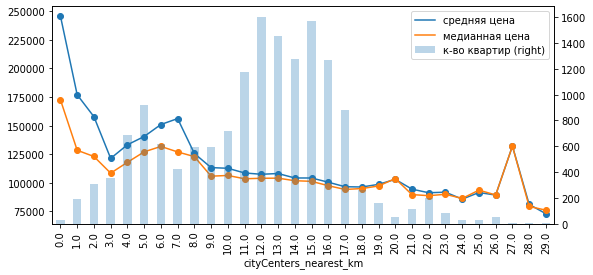

In [110]:
re_data_Piter = re_data[re_data['locality_name'] == 'Санкт-Петербург']
pivot_Piter_distance = re_data_Piter.pivot_table(index='cityCenters_nearest_km', values='price_meter', aggfunc=['mean', 'median','count'])
pivot_Piter_distance.columns = ['средняя цена','медианная цена', 'к-во квартир']
ax = pivot_Piter_distance.plot(y='средняя цена', style='o-', figsize=(9,4), grid=True)
pivot_Piter_distance.plot(y='медианная цена', style='o-', ax=ax)
pivot_Piter_distance.plot(y='к-во квартир', kind='bar', alpha=0.3, ax=ax, secondary_y=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0ca3a7a50>]],
      dtype=object)

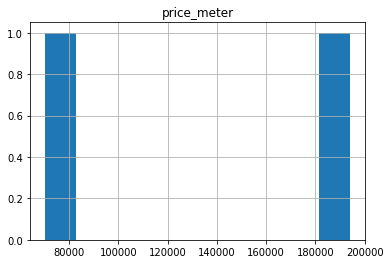

In [111]:
re_data_Piter.query('cityCenters_nearest_km == 27').hist('price_meter')

- По графику можно выделить две зоны:  от 0 до 3 км, от 3 км до 30 км. В каждой из этих зон наклон кривой (производная) примерно одинаков, за исключением локальных максимумов в р-не 6..7 км и 27 км, которые будут проанализированы ниже. Исходя из этих характеристик определяем центральную зону Санкт-Петербурга от 0 до 3 км
- Максимум 27 км не является статистически значимым, там всего 2 объекта.
- Горб в районе 3 км - 8 км (с локальным максимумом в 6-7км) хорошо выражен и подтвержден большим кол-вом квартир (в р-не 4-6 км, кстати, заметен горб и в кол-ве выставленных квартир). Я предполагаю, что на удалении 4-7 км от центра есть достаточно крупный район Санкт-Петербурга, который является привлекательным и, соответственно, стоимость метра в нем заметно выше аналогичных по удаленности районов.
- Существенное отличие медианной и средней арифметической цен в радиусе 8 км от центра указывает на то, что в этом радиусе влияние  самых дорогих объектов сильнее, чем в остальных местах

##### Анализ объектов в центре Санкт-Петербурга

In [112]:
# создаем срез для центра и исключаем редкие данные
Piter_center_filter = (re_data['locality_name'] == 'Санкт-Петербург')&(re_data['cityCenters_nearest_km'] <= 3.0)
Piter_center_filter_not_rare = (~re_data.is_rare)&Piter_center_filter
print(Piter_center_filter.sum(), Piter_center_filter_not_rare.sum())
re_data_Piter_center = re_data[Piter_center_filter_not_rare]

879 728


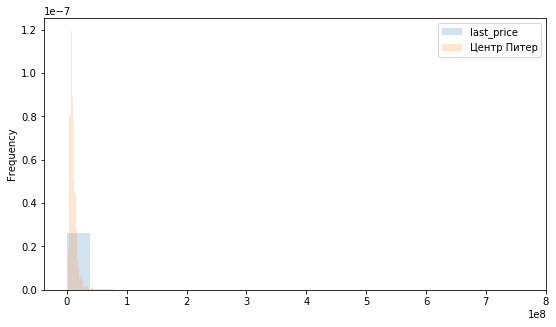

In [113]:
# Сначала посмотрим на основные характеристики квартир в центре, сравнив с общими данными
# Поскольку сравнивать надо несколько параметров, создадим соотве. функцию
def compare_hist(df_selected, col, range=None):
    ax = re_data.plot(kind='hist', y=col, alpha=0.2, range=range, figsize=(9,5), bins=20, density=True)
    df_selected.plot(kind='hist', y=col, ax=ax, alpha=0.2, label='Центр Питер', range=range, density=True,  bins=20)
    plt.show()

compare_hist(re_data_Piter_center, 'last_price')

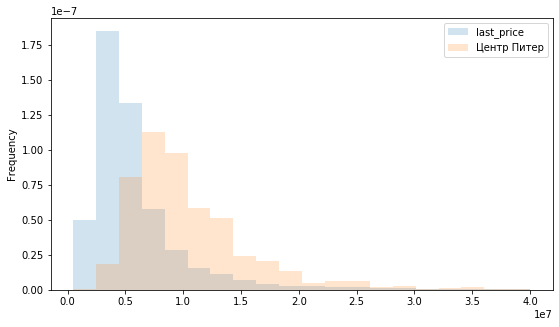

In [114]:
# Из-за очень дорогих квартир мало что видно, посмотрим в массовом диапазоне
compare_hist(re_data_Piter_center, 'last_price', (500000, 40000000))

Пик кривой общей стоимости ощутимо сдвинулся в сторону дорогих объектов

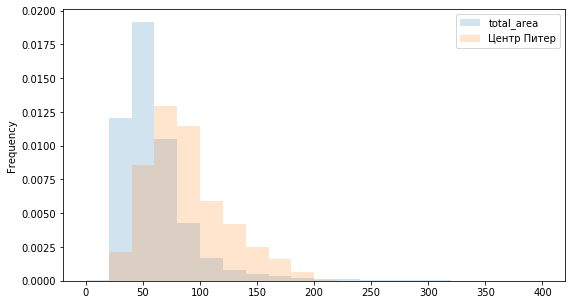

In [115]:
compare_hist(re_data_Piter_center, 'total_area', (0, 400))

Аналогично с площадью. Посмотрим распределение, если бОльшее разделить на бОльшее

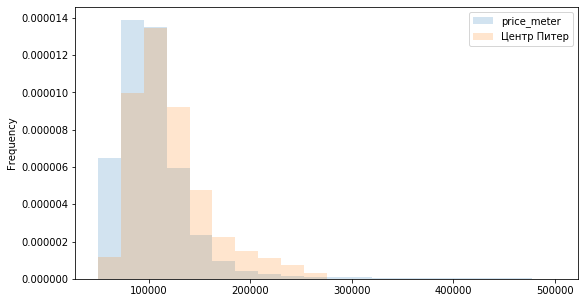

In [116]:
compare_hist(re_data_Piter_center, 'price_meter', (50000, 500000))

Пик кривой стоимости квадратного метра заметно сдвинулся вправо

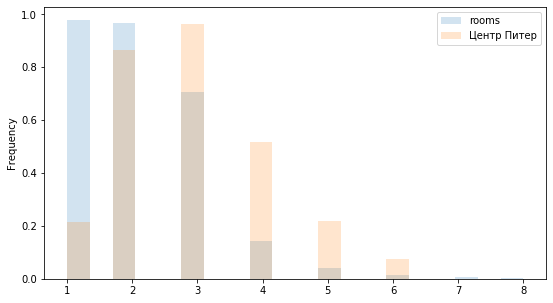

In [117]:
compare_hist(re_data_Piter_center, 'rooms', (1, 8))

Максимум с 1-комнатных квартир переместился в 3-комнатные 

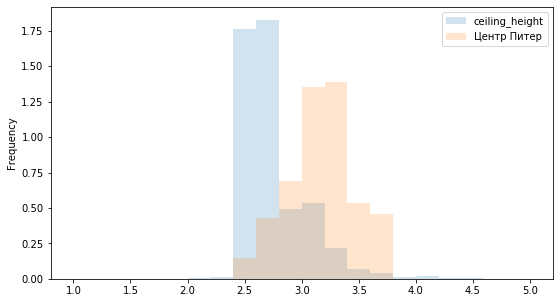

In [118]:
compare_hist(re_data_Piter_center, 'ceiling_height', (1, 5))

Наиболее характерное значение высоты потолков для центра Санкт-Петербурга в районе 3.5 метров (в отличие от 2.5-2.8 - обычного максимума, пожалуй, для всех российских городов)

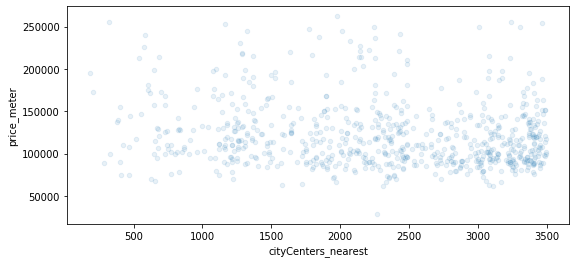

Коэффициент корреляции Пирсона -0.16 между  price_meter, cityCenters_nearest


In [119]:
# Ключевым индикатором цены недвижимости выбираем стоимость квадратного метра. 
# Далее проанализируем зависимости следующим образом
# Для числовых данных будем сначала смотреть диаграмму рассеяния и вычислять коэффициент корреляции, если необходимо
# Для категориальных данных будем усреднять данные для каждой категории и смотреть график зависимости средних цен от категорий

columns_of_interest = [
    'cityCenters_nearest',
    'ceiling_height',
    'total_area',
    'rooms',
    'floor_category',
    'cityCenters_nearest_km',
    'ceiling_category',
    'first_month_exposition',
    'first_year_exposition',
    'first_weekday_exposition',
    'parks_around3000',
    'ponds_around3000',
    'parks_nearest',
    'ponds_nearest'
   # 'price_meter',
]
columns_list_compare_corr = ['Корреляция с ценой, центр', 'Корреляция с ценой, все', 'Корреляция средних цен']
# создаем отдельную таблицу для всех коэффициентов корреляций, 
# включая корреляцию усредненных цен по категориям для категориальных столбцов
compare_corr = pd.DataFrame(index=columns_of_interest, columns=columns_list_compare_corr)

# Сделаем две функции для визуализации зависимости цены, и расчета коэффициента корреляции от числового параматра: 
def show_scatter(df, col_to_corr_df, col_y, col_x, xlim=None, ylim=None):
    df.plot(y=col_y, x=col_x, kind='scatter', alpha=0.1, ylim=ylim, xlim=xlim, figsize=(9,4))
    plt.show()
    corr_pirson = df[col_y].corr(df[col_x])
    compare_corr.loc[col_x, columns_list_compare_corr[col_to_corr_df]] = corr_pirson
    compare_corr.loc[col_x, columns_list_compare_corr[2]] = 'нет'
    print('Коэффициент корреляции Пирсона {:.2f} между  {}, {}'.format(corr_pirson, col_y, col_x))

# и от категориального параматра: 
def show_pivot_plot(df, col_y, col_x, show_count=True, sort_y=False):
    pivot_data = df.pivot_table(index=col_x, values=col_y, aggfunc=['mean', 'median', 'count'])
    pivot_data.columns = ['средняя', 'медианная', 'кол-во квартир']
    pivot_data['средняя'] = pivot_data['средняя'].round(0)
    pivot_data['медианная'] = pivot_data['медианная'].round(0)
    if sort_y:
        pivot_data = pivot_data.sort_values(by='средняя', ascending=False)
    ax = pivot_data.plot(y='средняя', style='o-', figsize=(9,4), grid=True)
    pivot_data.plot(y='медианная', style='o-', ax=ax, grid=True)
    if show_count:
        pivot_data.plot(y='кол-во квартир', kind='bar', alpha=0.3, ax=ax, secondary_y=True,  grid=True)
    plt.show()
    return pivot_data

# создадим отдельную функцию подсчета коэффициента корреляции между средней ценой по группировке по категориальному столбцу
# и будем запоминать такой коэффициент в общей таблице сравнения коэффициетов корреляции

def corr_for_category(groupby_df, col_to_corr_df, name_for_mean):
    name_for_corr = groupby_df.index.name
    groupby_df = groupby_df.reset_index()
    corr_pirson = groupby_df[name_for_mean].corr(groupby_df[name_for_corr])
    compare_corr.loc[name_for_corr, columns_list_compare_corr[col_to_corr_df]] = corr_pirson
    compare_corr.loc[name_for_corr, columns_list_compare_corr[2]] = 'Да'
    return corr_pirson
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[0])

На диаграмме рассеяния плохо видна зависимость стоимости метра от расстояния до центра. Коэффициент корреляции всего 0.16. Заметно, что чем дальше от центра, тем более объекты концентрируются в нижнем ценовом сегменте. Но для каких-то выводов недостаточно. Мы оценим ниже зависимость по усредненным данным после группировки по км категориям

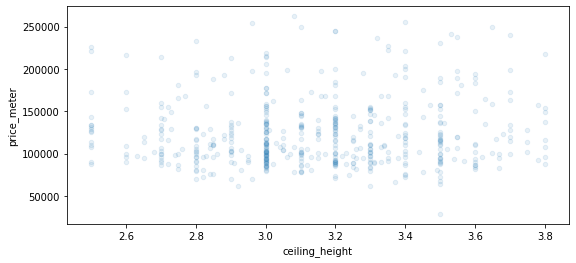

Коэффициент корреляции Пирсона 0.06 между  price_meter, ceiling_height


In [120]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[1])

На диаграмме зависимость стоимости метра от высоты потолка не прослеживается. Коэфициент корреляции всего лишь 0.06. Разброс цен от 3м и выше возрастает. Хорошо видны наиболее характерные величины для высоты потолка. Ниже мы посмотрим зависимость стоимости метра от введенных нами категорий по высоте потолка

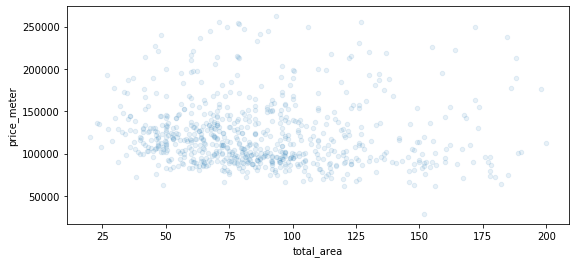

Коэффициент корреляции Пирсона -0.07 между  price_meter, total_area


In [121]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[2])

На диаграмме зависимость стоимости метра от общей площади помещения прослеживается с трудом. Коэфициент корреляции всего лишь 0.07. 

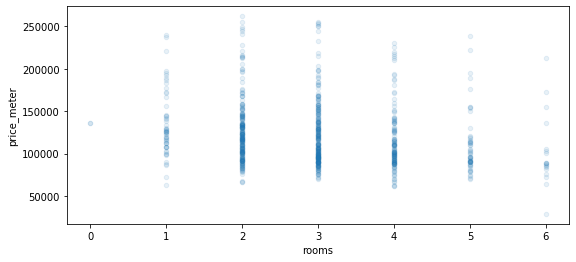

Коэффициент корреляции Пирсона -0.19 между  price_meter, rooms


In [122]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[3])

На диаграмме зависимость стоимости метра от высоты потолка прослеживается слабо. Общий вид диаграммы напоминает вид диаграммы для высоты потолка - вертикальные столбики с распределением по яркости внутри каждого столбика. Заметно, что столбики распределение цены по комнатам имеют тенденцию снижаться с ростом числа комнат. Это подтверждает и коэфициент корреляции -0.19 и это почти в три раза больше, чем для корреляции стоимости и высоты потолка. 

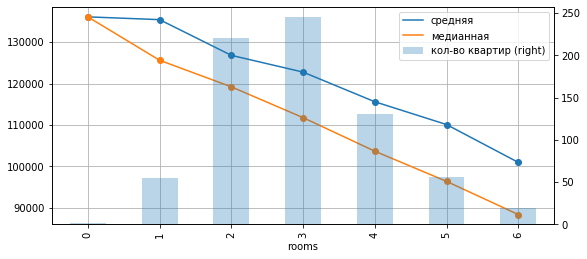

,средняя,медианная,кол-во квартир
rooms,,,
0,136079.0,136079.0,2
1,135408.0,125610.0,55
2,126798.0,119201.0,220
3,122754.0,111765.0,245
4,115598.0,103670.0,131
5,110097.0,96384.0,56
6,100968.0,88383.0,19


In [123]:
pvt = show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[3])
pvt

Если же сгруппировать все данные по кол-ву комнат, посчитать среднюю для каждой категории, тогда появляется четкая линейная зависимость, как очень хорошо видно из графика.

In [124]:
# Посчитаем коэффициент корреляции между кол-вом комнат (рассматривая кол-во комнат как категориальный признак)
# и средней ценой квадратного метра для каждой категории квартир (т.е. 1-комнатные, 2-комнатные и т.д.)
# Вообще говоря и так видно из графика выше, что коэффициент корреляции будет близок к единице, но убедимся в этом

name_for_corr = pvt.index.name
pvt = pvt.reset_index()
corr_pirson = pvt['средняя'].corr(pvt[name_for_corr])
print('Коэффициент корреляции Пирсона {c:.2f} между средней арифметической {y}, усредненной по категориям в {x}, и категориями {x}'.format(c=corr_pirson, y='price_meter', x=name_for_corr))


Коэффициент корреляции Пирсона -0.99 между средней арифметической price_meter, усредненной по категориям в rooms, и категориями rooms


In [125]:
# для демонстрации количественного показателя изменений нам понадобится функция
def diff_percent(table_group, row_basic, row_diff, col):
    diff = round((table_group.loc[row_diff, col] - table_group.loc[row_basic, col]) / table_group.loc[row_basic, col] * 100, 1)
    print('Изменение цены: {}, {} отличается от {} на {}%'.format(col, row_diff, row_basic, diff))

basic_row = 1
row_list = [2, 3, 4, 5]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, 2 отличается от 1 на -6.4%
Изменение цены: средняя, 3 отличается от 1 на -9.3%
Изменение цены: средняя, 4 отличается от 1 на -14.6%
Изменение цены: средняя, 5 отличается от 1 на -18.7%
Изменение цены: медианная, 2 отличается от 1 на -5.1%
Изменение цены: медианная, 3 отличается от 1 на -11.0%
Изменение цены: медианная, 4 отличается от 1 на -17.5%
Изменение цены: медианная, 5 отличается от 1 на -23.3%


- Корреляция между числом комнат и средними значениями для каждой комнаты близка к единице. Коэффициент корреляции между стоимостью метра и числом комнат -0.2, а между средней стоимостью метра и числом комнат -0.99.
- Наши данные позволяют оценить зависимость средней стоимости квадратного метра от числа комнат в диапазоне 1-5 комнатных квартир, поскольку для квартир с бОльшим числом комнат недостаточно данных. 
- Средняя стоимость метра падает с ростом числа комнат, однокомнатные самые дорогие.
- С увеличением кол-ва комнат стоимость метра падает примерно на 5-6% за каждую комнату. 
- **Примечание - нижеследующий вывод был сделан на основе данных, которые включали достоверные данные для уникальных объектов. Отбросив эти данные, мы лишились возможности сделать такой вывод.** Средняя арифметическая цена, хотя и отражает в целом такую же тенденцию, имеет всплеск для 4- и 5- комнатных квартир. Скорее всего, этот факт свидетельствует о том, что в категориях 4- и 5- комнатных квартир представлено заметное кол-во уникально (для нашей базы) дорогих объектов

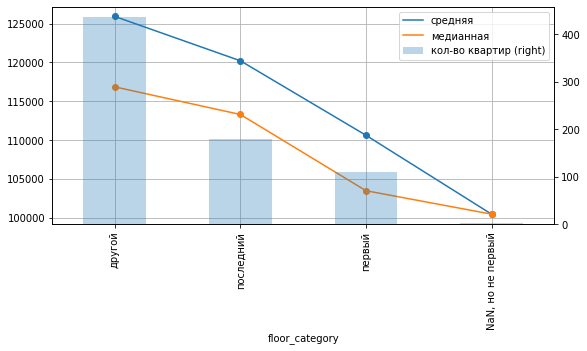

,средняя,медианная,кол-во квартир
floor_category,,,
другой,125937.0,116853.0,436
последний,120220.0,113293.0,180
первый,110615.0,103464.0,110
"NaN, но не первый",100442.0,100442.0,2


In [126]:
pvt = show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[4], sort_y=True)
pvt

In [127]:
basic_row = 'другой'
row_list = ['последний', 'первый']
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, последний отличается от другой на -4.5%
Изменение цены: средняя, первый отличается от другой на -12.2%
Изменение цены: медианная, последний отличается от другой на -3.0%
Изменение цены: медианная, первый отличается от другой на -11.5%


- Самая высокая стоимость метра, если квартира не на первом и не на последнем этаже.
- Последний этаже уменьшает стоимость метра на 3-5%
- Первый этаж уменьшает стоимость метра на 10-11%
- Во всех категориях разница между средними свидетельствует о существенном влиянии уникально дорогих объектов, влияние таких объектов сокращается с паденим средней стоимости метра

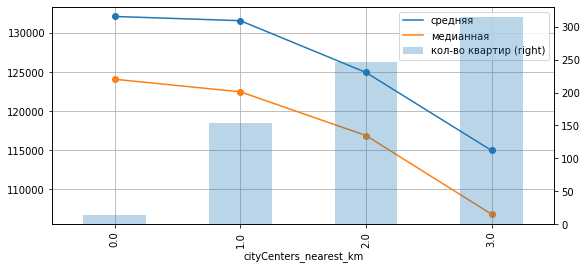

,средняя,медианная,кол-во квартир
cityCenters_nearest_km,,,
0.0,132100.0,124056.0,14
1.0,131557.0,122449.0,153
2.0,124929.0,116853.0,246
3.0,114942.0,106784.0,315


In [128]:
pvt = show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[5])
pvt

Как видно из графика средняя стоимость метра зависит от расстояния до центра. Мы уже вычисляли коэффициент корреляции стоиомости квадратного метра от расстояния и он равнялся -0.16. Посмотрим, чему он равен с округленными до км расстояниями.

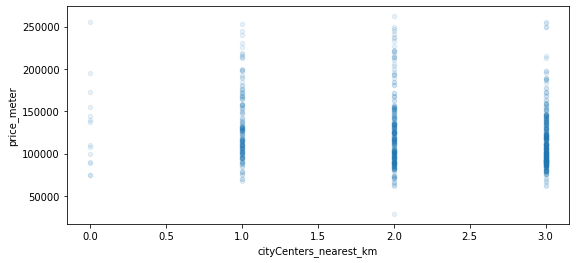

Коэффициент корреляции Пирсона -0.17 между  price_meter, cityCenters_nearest_km


In [129]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[5])

Вид диаграммы рассеяния для округленных расстояний сильно поменялся, но коэффициент практически не изменился (что и следовало ожидать)

In [130]:
basic_row = 0.0
row_list = [1.0, 2.0, 3.0]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, 1.0 отличается от 0.0 на -0.4%
Изменение цены: средняя, 2.0 отличается от 0.0 на -5.4%
Изменение цены: средняя, 3.0 отличается от 0.0 на -13.0%
Изменение цены: медианная, 1.0 отличается от 0.0 на -1.3%
Изменение цены: медианная, 2.0 отличается от 0.0 на -5.8%
Изменение цены: медианная, 3.0 отличается от 0.0 на -13.9%


In [131]:
# сохраним в строке для cityCenters_nearest_km коэффициент корреляции средних цен, 
# поскольку по ценам вообще он уже сохранен в строке cityCenters_nearest
print(corr_for_category(pvt, 0, 'средняя'))

-0.9389359558949907


- По усредненным в "километровых" категориях расстояния до центра данным зависимость средней цены от расстояния явная: цена планомерно снижается, начиная с 1 км. Разница между 0 и 1 км несущественная. Коэффициент корреляции средних цен и  округленных до километра расстояний составляет 0.93
- **Нижеследующий вывод был сделан на основе данных с дорогими квартирами** Разница между медианной ценой и средней арифметической ценой заметно сокращается при удалении от центра. Это свидетельствует о том, что чем ближе к центру, тем влияние уникальных дорогих квартир выше

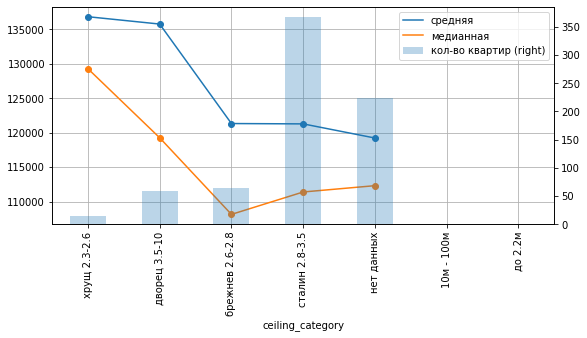

,средняя,медианная,кол-во квартир
ceiling_category,,,
хрущ 2.3-2.6,136814.0,129268.0,15
дворец 3.5-10,135748.0,119253.0,59
брежнев 2.6-2.8,121319.0,108143.0,64
сталин 2.8-3.5,121269.0,111392.0,367
нет данных,119218.0,112308.0,223
10м - 100м,NaN,NaN,0
до 2.2м,NaN,NaN,0


In [132]:
pvt = show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[6], sort_y=True)
pvt

In [133]:
basic_row = 'дворец 3.5-10'
row_list = ['сталин 2.8-3.5', 'брежнев 2.6-2.8']
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, сталин 2.8-3.5 отличается от дворец 3.5-10 на -10.7%
Изменение цены: средняя, брежнев 2.6-2.8 отличается от дворец 3.5-10 на -10.6%
Изменение цены: медианная, сталин 2.8-3.5 отличается от дворец 3.5-10 на -6.6%
Изменение цены: медианная, брежнев 2.6-2.8 отличается от дворец 3.5-10 на -9.3%


- У нас достаточное кол-во данных только для следующих категорий квартир: потолки в диапазонах 2.6м-2.8м, 2.8м-3.5м, 3.5м-10.0м
- Квартиры с потолками  2.6м-2.8м дешевле примерно на 10% - 11% чем квартиры с потолками 3.5м-10.0м. 
- Квартиры с потолками 2.8м-3.5м дешевле примерно на 6%-10% чем квартиры с потолками 3.5м-10.0м. 
- Разница во всех трех категориях квартир между медианной ценой и средней арифметической весьма внушительная, что говорит о существенном влиянии уникально дорогих квартир в каждой категории. 

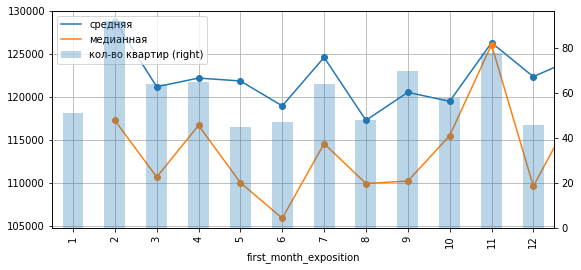

,средняя,медианная,кол-во квартир
first_month_exposition,,,
1,128880.0,117245.0,51
2,121170.0,110658.0,92
3,122183.0,116670.0,64
4,121848.0,110000.0,65
5,118943.0,105853.0,45
6,124595.0,114545.0,47
7,117262.0,109902.0,64
8,120523.0,110186.0,48
9,119474.0,115470.0,70


In [134]:
show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[7])

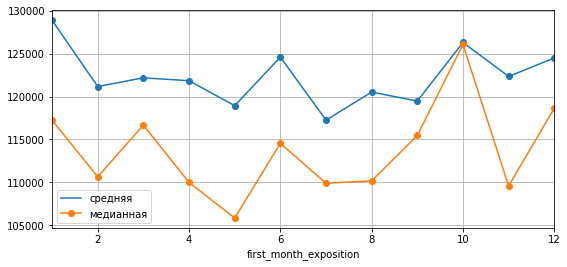

,средняя,медианная,кол-во квартир
first_month_exposition,,,
1,128880.0,117245.0,51
2,121170.0,110658.0,92
3,122183.0,116670.0,64
4,121848.0,110000.0,65
5,118943.0,105853.0,45
6,124595.0,114545.0,47
7,117262.0,109902.0,64
8,120523.0,110186.0,48
9,119474.0,115470.0,70


In [135]:
# Я пока не разобрался с некоторыми особенностями работы .plot в случае использования разных масштабов для оси Y
# Здесь как раз такой случай - почему-то месяц на графике сместился +1 
# Просто перерисовал без вывода кол-ва объектов
show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[7], show_count=False)

- Заметны небольшие сезонные колебания цен: летом (начиная с мая) цены снижаются, затем с сентября возвращаются на нормальный уровень. 

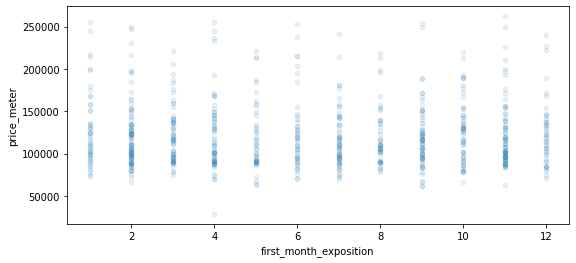

Коэффициент корреляции Пирсона -0.01 между  price_meter, first_month_exposition


In [136]:
# Оценим корреляцию цен с месяцем
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[7])

Близок к 0

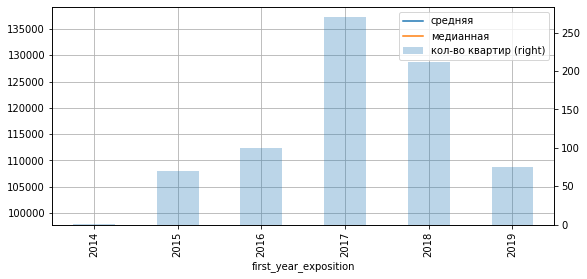

,средняя,медианная,кол-во квартир
first_year_exposition,,,
2014,137288.0,137288.0,1
2015,116128.0,99708.0,70
2016,112548.0,101700.0,100
2017,118287.0,112098.0,270
2018,130623.0,120068.0,212
2019,130215.0,123622.0,75


In [137]:
show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[8])

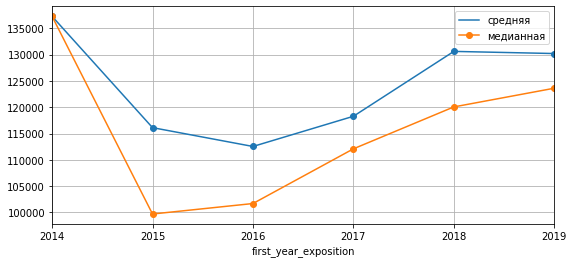

,средняя,медианная,кол-во квартир
first_year_exposition,,,
2014,137288.0,137288.0,1
2015,116128.0,99708.0,70
2016,112548.0,101700.0,100
2017,118287.0,112098.0,270
2018,130623.0,120068.0,212
2019,130215.0,123622.0,75


In [138]:
# Здесь тоже пришлось нарисовать график без кол-ва квартир
show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[8], show_count=False)

Для 2014 года объектов в наший базе совсем немного, поэтому наблюдаемое резкое падение цены с 2014 до 2015 года является мало обоснованным в наших данных. По нашим данным однако можно точно говорить об окончании снижения цен в 2016 году и плавном росте в последующие годы вплоть до 2018. В 2019 году к рост замедлился

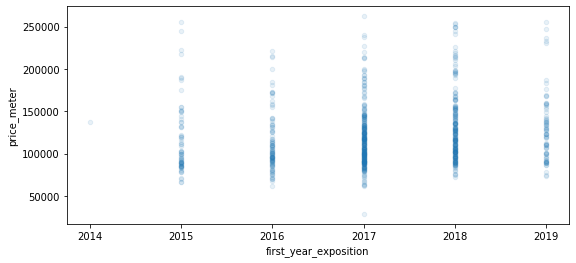

Коэффициент корреляции Пирсона 0.16 между  price_meter, first_year_exposition


In [139]:
# посмотрим корреляцию цен в с годом
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[8])

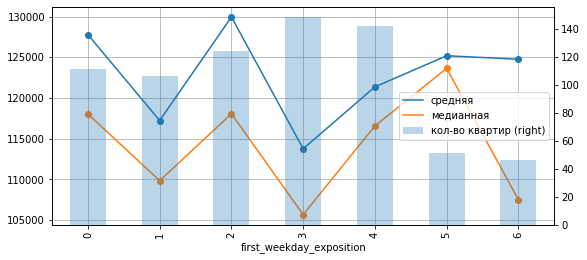

,средняя,медианная,кол-во квартир
first_weekday_exposition,,,
0,127770.0,118035.0,111
1,117233.0,109849.0,106
2,129945.0,118065.0,124
3,113769.0,105684.0,148
4,121364.0,116568.0,142
5,125186.0,123636.0,51
6,124751.0,107522.0,46


In [140]:
show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[9])

- Есть весьма характерный спад активности (т.е. кол-во выставляемых квартир) в выходные дни. 
- Есть минимумы в ценах - вторник и четверг. 
- В субботу разница между средними минимальна, в воскресенье - максимальна. Причем разница в воскресенье настолько значительна, что по средней цене в воскресенье максимум, а по медиане минимум. Возможно, в воскресенье любимый день для выставления дорогих квартир.

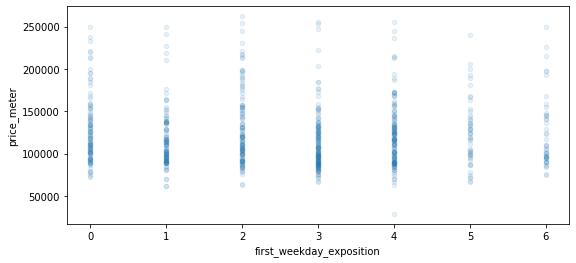

Коэффициент корреляции Пирсона -0.03 между  price_meter, first_weekday_exposition


In [141]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[9])

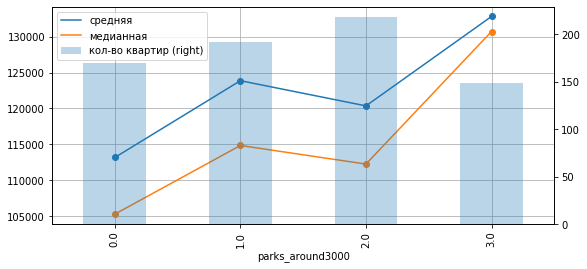

,средняя,медианная,кол-во квартир
parks_around3000,,,
0.0,113160.0,105255.0,170
1.0,123870.0,114833.0,192
2.0,120357.0,112237.0,218
3.0,132831.0,130729.0,148


In [142]:
pvt = show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[10])
pvt

In [143]:
basic_row = 0.0
row_list = [1.0, 2.0, 3.0]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, 1.0 отличается от 0.0 на 9.5%
Изменение цены: средняя, 2.0 отличается от 0.0 на 6.4%
Изменение цены: средняя, 3.0 отличается от 0.0 на 17.4%
Изменение цены: медианная, 1.0 отличается от 0.0 на 9.1%
Изменение цены: медианная, 2.0 отличается от 0.0 на 6.6%
Изменение цены: медианная, 3.0 отличается от 0.0 на 24.2%


In [144]:
print(corr_for_category(pvt, 0, 'средняя'))

0.8766063413246086


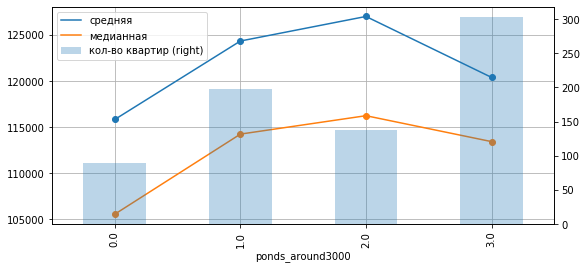

,средняя,медианная,кол-во квартир
ponds_around3000,,,
0.0,115821.0,105548.0,90
1.0,124327.0,114229.0,197
2.0,126990.0,116225.0,138
3.0,120382.0,113416.0,303


In [145]:
pvt = show_pivot_plot(re_data_Piter_center, 'price_meter', columns_of_interest[11])
pvt

In [146]:
basic_row = 0.0
row_list = [1.0, 2.0, 3.0]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, 1.0 отличается от 0.0 на 7.3%
Изменение цены: средняя, 2.0 отличается от 0.0 на 9.6%
Изменение цены: средняя, 3.0 отличается от 0.0 на 3.9%
Изменение цены: медианная, 1.0 отличается от 0.0 на 8.2%
Изменение цены: медианная, 2.0 отличается от 0.0 на 10.1%
Изменение цены: медианная, 3.0 отличается от 0.0 на 7.5%


In [147]:
print(corr_for_category(pvt, 0, 'средняя'))

0.4336086834295947


Наличие парков и прудов увеличивает среднюю стоимость метра.
- 1-2 парка увеличивают стоиомость на 7-9%, три парка - примерно на 20%
- Наличие прудов, вне зависимости от кол-ва увеличивают цену примерно на 5-10%


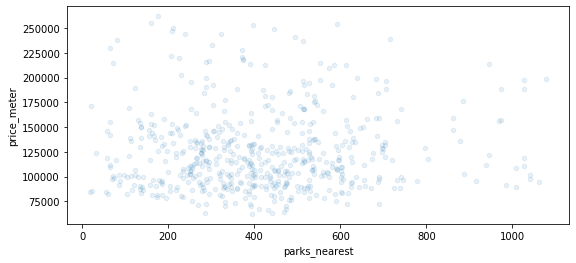

Коэффициент корреляции Пирсона 0.05 между  price_meter, parks_nearest


In [148]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[12])

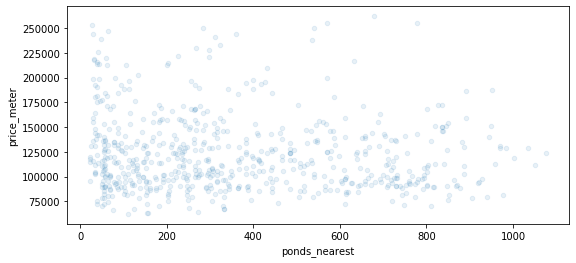

Коэффициент корреляции Пирсона -0.11 между  price_meter, ponds_nearest


In [149]:
show_scatter(re_data_Piter_center, 0, 'price_meter', columns_of_interest[13])

In [150]:
compare_corr

,"Корреляция с ценой, центр","Корреляция с ценой, все",Корреляция средних цен
cityCenters_nearest,-0.161173,NaN,нет
ceiling_height,0.0560623,NaN,нет
total_area,-0.0710204,NaN,нет
rooms,-0.185258,NaN,нет
floor_category,NaN,NaN,NaN
cityCenters_nearest_km,-0.938936,NaN,Да
ceiling_category,NaN,NaN,NaN
first_month_exposition,-0.00533518,NaN,нет
first_year_exposition,0.155813,NaN,нет
first_weekday_exposition,-0.0257451,NaN,нет


- Коэффициенты корреляции стоимости квадратного метра и различных параметров небольшие (все менее 0.2)
- Самый большой коэффициент корреляции стоимости квадратного метра и числа комнат -0.185
- Корреляция средних цен стоимости квадратного метра и различными категориальными параметрами значительно выше, подробные численные оценки приведены для каждого категориального параметра.
- Важное наблюдение. Мы можем категоризировать любой численный параметр, просто разбив весь диапазон на отрезки. Усреднив стоимость квадратного метра по группировке по диапазонам в таком категоризированном параметре, мы можем выявить довольно четкие и однозначные зависимости. В качестве иллюстрации в таблице коэффициентов корреляции представлены значения корреляций стоимости квадратного метра и некоторых параметров - расстояние до центра, наличие парков/прудов.

##### Анализ цен по всем объектам

In [151]:
re_data = re_data[~re_data.is_rare]

In [152]:
len(re_data)

22659

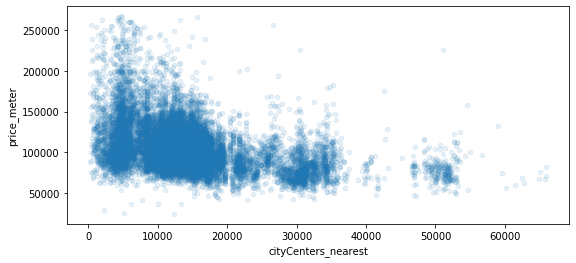

Коэффициент корреляции Пирсона -0.40 между  price_meter, cityCenters_nearest


In [153]:
show_scatter(re_data, 1, 'price_meter', columns_of_interest[0])

Коэффициент корреляции значительно вырос по сравнению с данными по центру Сантк-Петербурга

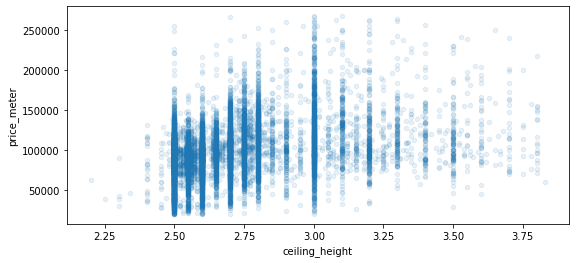

Коэффициент корреляции Пирсона 0.35 между  price_meter, ceiling_height


In [154]:
show_scatter(re_data, 1, 'price_meter', columns_of_interest[1])

На диаграмме заметно следующее:
- разброс цен сужается при приближении к высоте потолка 2.5 м
- есть достаточно заметный рост цены при увеличении высоты потолков
- коэффициент корреляции выше чем для центра Санкт-Петербурга

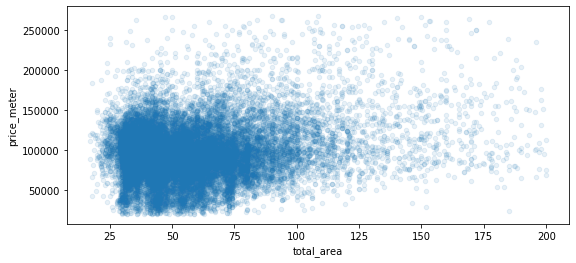

Коэффициент корреляции Пирсона 0.19 между  price_meter, total_area


In [155]:
show_scatter(re_data, 1, 'price_meter', columns_of_interest[2])

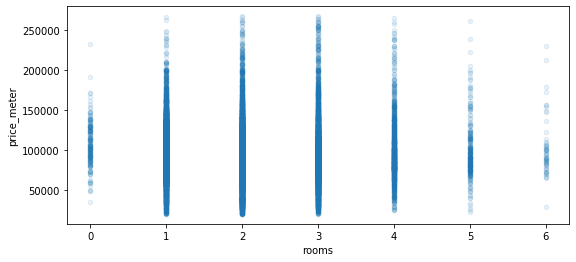

Коэффициент корреляции Пирсона -0.05 между  price_meter, rooms


In [156]:
show_scatter(re_data, 1, 'price_meter', columns_of_interest[3])

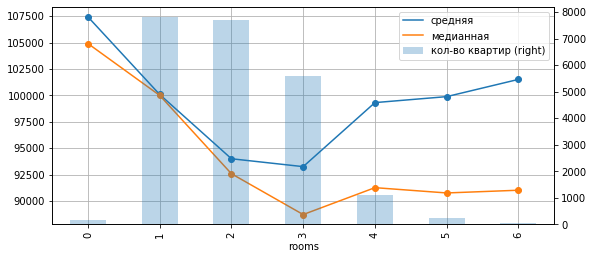

,средняя,медианная,кол-во квартир
rooms,,,
0,107425.0,104902.0,180
1,100087.0,100000.0,7800
2,94010.0,92593.0,7685
3,93264.0,88735.0,5592
4,99318.0,91277.0,1093
5,99884.0,90776.0,250
6,101512.0,91034.0,59


In [157]:
pvt = show_pivot_plot(re_data, 'price_meter', columns_of_interest[3])
pvt

In [158]:
basic_row = 1
row_list = [2, 3, 4, 5, 6]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)

Изменение цены: средняя, 2 отличается от 1 на -6.1%
Изменение цены: средняя, 3 отличается от 1 на -6.8%
Изменение цены: средняя, 4 отличается от 1 на -0.8%
Изменение цены: средняя, 5 отличается от 1 на -0.2%
Изменение цены: средняя, 6 отличается от 1 на 1.4%
Изменение цены: медианная, 2 отличается от 1 на -7.4%
Изменение цены: медианная, 3 отличается от 1 на -11.3%
Изменение цены: медианная, 4 отличается от 1 на -8.7%
Изменение цены: медианная, 5 отличается от 1 на -9.2%
Изменение цены: медианная, 6 отличается от 1 на -9.0%


- Наши данные позволяют оценить зависимость стоимости квадратного метра от числа комнат в диапазоне 1-6 комнатных квартир. 
- Стоимость метра падает от однокомнатных, проходит минимум в 3-комнатных, далее растет по мере роста числа комнат, хотя в диапазоне 4-6 комнатных рост практически не заметен
- Расхождение между средними ценами заметно растет с ростом числа комнат, начиная с 2-комнатных, что свидетельствует, что чем больше комнат, тем сильнее влияние дорогих квартир
- Средняя арифметическая цена метра практически не отличается для 1- и 4-, 5-, 6- комнатных квартир, при этом медианная цена для 1-комнатных и многокомнатных квартир отличается на 10%

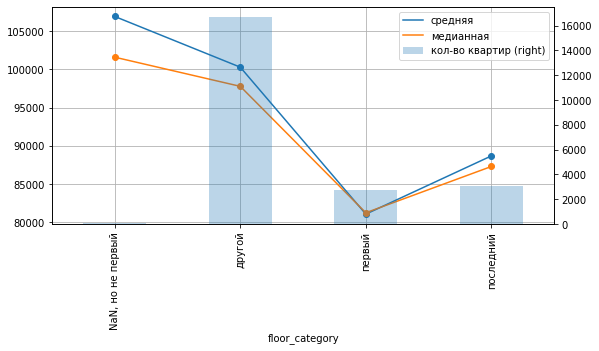

,средняя,медианная,кол-во квартир
floor_category,,,
"NaN, но не первый",106938.0,101603.0,82
другой,100295.0,97784.0,16693
первый,81044.0,81224.0,2781
последний,88672.0,87287.0,3103


In [159]:
pvt = show_pivot_plot(re_data, 'price_meter', columns_of_interest[4])
pvt

In [160]:
basic_row = 'другой'
row_list = ['последний', 'первый']
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)

Изменение цены: средняя, последний отличается от другой на -11.6%
Изменение цены: средняя, первый отличается от другой на -19.2%
Изменение цены: медианная, последний отличается от другой на -10.7%
Изменение цены: медианная, первый отличается от другой на -16.9%


- Самая высокая стоимость метра, если квартира не на первом и не на последнем этаже.
- Последний этаже уменьшает стоимость метра примерно на 11%.
- Первый этаж уменьшает стоимость метра на 17-19%.
- Влияние уникально дорогих объектов для квартир на первом этаже минимально.

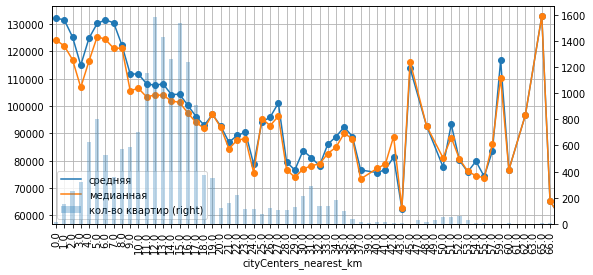

,средняя,медианная,кол-во квартир
cityCenters_nearest_km,,,
0.0,132100.0,124056.0,14
1.0,131395.0,121904.0,154
2.0,125182.0,116883.0,247
3.0,114885.0,106770.0,316
4.0,124745.0,116392.0,627
...,...,...,...
61.0,60606.0,60606.0,1
62.0,69114.0,69114.0,1
63.0,62500.0,62500.0,1


In [161]:
pvt = show_pivot_plot(re_data, 'price_meter', columns_of_interest[5])
pvt

Влияние расстояния от центра на стоимость квартир в Санкт-Петербурге уже проанализировано. Распределение средних цен по локациям также уже проведено, добавим только корреляцию средних по категориям 1км

In [162]:
print(corr_for_category(pvt, 1, 'средняя'))

-0.696813572393523


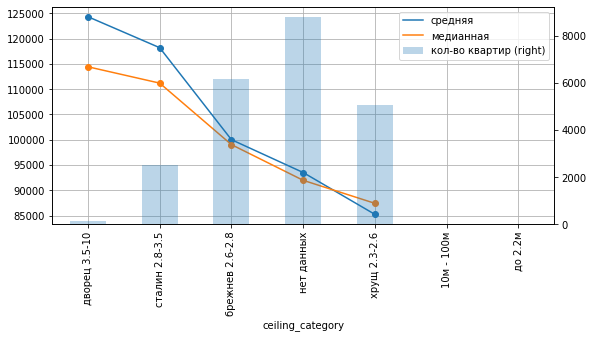

,средняя,медианная,кол-во квартир
ceiling_category,,,
дворец 3.5-10,124320.0,114428.0,132
сталин 2.8-3.5,118198.0,111200.0,2514
брежнев 2.6-2.8,100026.0,99050.0,6151
нет данных,93536.0,91996.0,8798
хрущ 2.3-2.6,85265.0,87446.0,5064
10м - 100м,NaN,NaN,0
до 2.2м,NaN,NaN,0


In [163]:
pvt = show_pivot_plot(re_data, 'price_meter', columns_of_interest[6], sort_y=True)
pvt

In [164]:
basic_row = 'дворец 3.5-10'
row_list = ['сталин 2.8-3.5', 'брежнев 2.6-2.8', 'хрущ 2.3-2.6']
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)

Изменение цены: средняя, сталин 2.8-3.5 отличается от дворец 3.5-10 на -4.9%
Изменение цены: средняя, брежнев 2.6-2.8 отличается от дворец 3.5-10 на -19.5%
Изменение цены: средняя, хрущ 2.3-2.6 отличается от дворец 3.5-10 на -31.4%
Изменение цены: медианная, сталин 2.8-3.5 отличается от дворец 3.5-10 на -2.8%
Изменение цены: медианная, брежнев 2.6-2.8 отличается от дворец 3.5-10 на -13.4%
Изменение цены: медианная, хрущ 2.3-2.6 отличается от дворец 3.5-10 на -23.6%


- Средняя стоимость равномерно, практически линейно падает с уменьшением высоты потолка.
- Разница между средними ценами существенна только в категориях с самыми высокими потолками: от 2.8м и выше, что говорит о том, что дорогие объекты представлены в основном в этих категориях.
- В категории потолков 2.3-2.6 метров средняя арифметическая даже чуть меньше, чем медианная - в этой категории влияние слишком дешевых сильнее, чем слишком дорогих
- Снижение стоимости квадратного метра от "дворца" к "сталину" составляет 3-5%
- Снижение стоимости квадратного метра от "дворца" к "брежневу" составляет 13-20%
- Снижение стоимости квадратного метра от "дворца" к "хрущу" составляет 24-31%

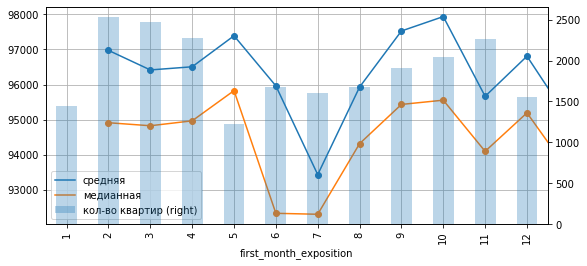

,средняя,медианная,кол-во квартир
first_month_exposition,,,
1,96974.0,94914.0,1440
2,96417.0,94828.0,2532
3,96507.0,94968.0,2474
4,97390.0,95828.0,2274
5,95963.0,92335.0,1220
6,93437.0,92308.0,1678
7,95929.0,94318.0,1601
8,97526.0,95435.0,1671
9,97936.0,95556.0,1911


In [165]:
show_pivot_plot(re_data, 'price_meter', columns_of_interest[7])

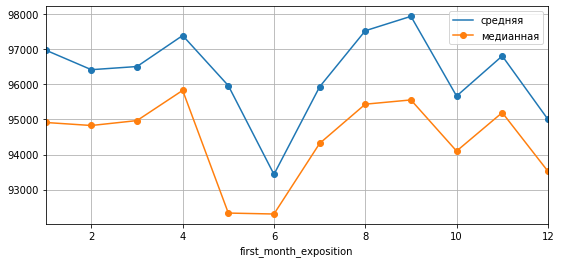

,средняя,медианная,кол-во квартир
first_month_exposition,,,
1,96974.0,94914.0,1440
2,96417.0,94828.0,2532
3,96507.0,94968.0,2474
4,97390.0,95828.0,2274
5,95963.0,92335.0,1220
6,93437.0,92308.0,1678
7,95929.0,94318.0,1601
8,97526.0,95435.0,1671
9,97936.0,95556.0,1911


In [166]:
show_pivot_plot(re_data, 'price_meter', columns_of_interest[7], show_count=False)

- Заметны небольшие сезонные колебания цен: летом цены немного снижаются (минимум - июнь). 
- Есть незначительный локальный минимум в октябре.
- В активности также заметны сезонные колебания - минимумы в январе, мае - вероятно, связаны с длинными праздниками в эти месяцы

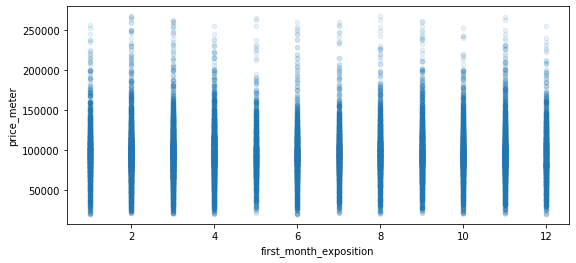

Коэффициент корреляции Пирсона -0.00 между  price_meter, first_month_exposition


In [167]:
# добавим коэффициент корреляции в общую таблицу для сравнения
show_scatter(re_data, 1, 'price_meter', columns_of_interest[7])

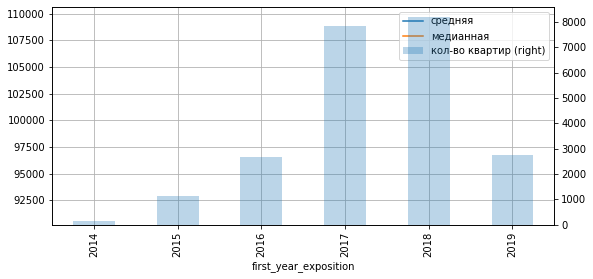

,средняя,медианная,кол-во квартир
first_year_exposition,,,
2014,109690.0,105797.0,121
2015,97545.0,92233.0,1121
2016,93501.0,91146.0,2656
2017,94394.0,92105.0,7844
2018,96318.0,95563.0,8176
2019,103850.0,103067.0,2741


In [168]:
show_pivot_plot(re_data, 'price_meter', columns_of_interest[8])

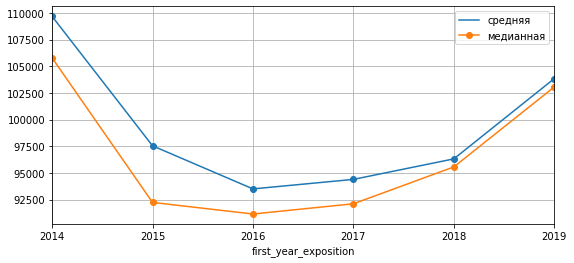

,средняя,медианная,кол-во квартир
first_year_exposition,,,
2014,109690.0,105797.0,121
2015,97545.0,92233.0,1121
2016,93501.0,91146.0,2656
2017,94394.0,92105.0,7844
2018,96318.0,95563.0,8176
2019,103850.0,103067.0,2741


In [169]:
show_pivot_plot(re_data, 'price_meter', columns_of_interest[8], show_count=False)

- Для 2014 года объектов в общей базе уже достаточно, и можно с уверенностью говорить о резком падении средних цен в 2015 году.  
- В 2016 году цены еще немного снизились и далее начали плавно расти вплоть до 2019. 
- Очень заметно планомерное сокращение разницы между средними на всем наблюдаемом промежутке. В 2015 разница максимальна, в 2018 и 2019 минимальна. 
- За счет сужения разницы средних рост между 2016 и 2019 годах в медианной цене заметнее, в средней арифметической он меньше. Это свидетельствует о том, рост в массовом сегменте был заметнее, чем рост в сегменте дорогих квартир 

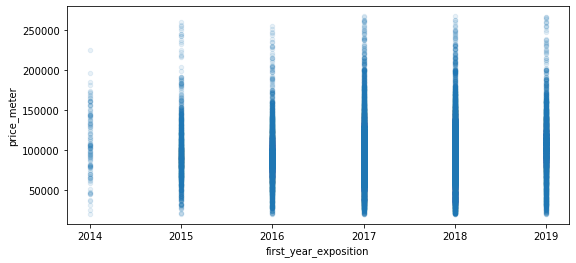

Коэффициент корреляции Пирсона 0.05 между  price_meter, first_year_exposition


In [170]:
# добавим коэффициент корреляции в общую таблицу для сравнения
show_scatter(re_data, 1, 'price_meter', columns_of_interest[8])

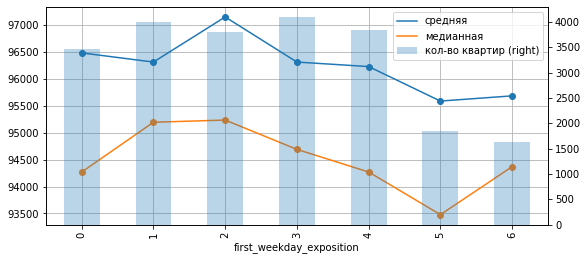

,средняя,медианная,кол-во квартир
first_weekday_exposition,,,
0,96487.0,94271.0,3464
1,96317.0,95197.0,3997
2,97156.0,95238.0,3799
3,96317.0,94692.0,4087
4,96233.0,94271.0,3838
5,95591.0,93478.0,1848
6,95688.0,94371.0,1626


In [171]:
show_pivot_plot(re_data, 'price_meter', columns_of_interest[9])

Виден весьма характерный спад активности (т.е. кол-во выставляемых квартир) в выходные дни. Также можно говорить о незначительном снижении цен для квартир, выставленных в weekend 

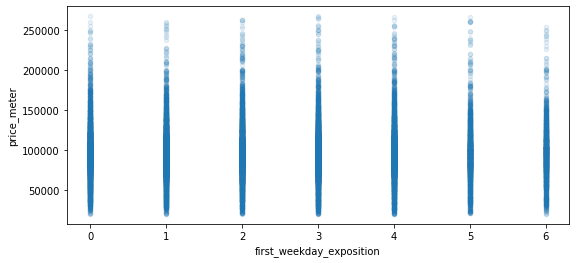

Коэффициент корреляции Пирсона -0.01 между  price_meter, first_weekday_exposition


In [172]:
# добавим коэффициент корреляции в общую таблицу для сравнения
show_scatter(re_data, 1, 'price_meter', columns_of_interest[9])

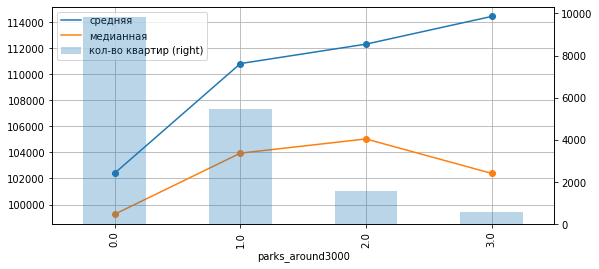

,средняя,медианная,кол-во квартир
parks_around3000,,,
0.0,102419.0,99265.0,9832
1.0,110813.0,103943.0,5448
2.0,112302.0,105032.0,1590
3.0,114426.0,102395.0,550


In [173]:
pvt = show_pivot_plot(re_data, 'price_meter', columns_of_interest[10])
pvt

In [174]:
print(corr_for_category(pvt, 1, 'средняя'))

0.9205313490768278


In [175]:
basic_row = 0.0
row_list = [1.0, 2.0, 3.0]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, 1.0 отличается от 0.0 на 8.2%
Изменение цены: средняя, 2.0 отличается от 0.0 на 9.6%
Изменение цены: средняя, 3.0 отличается от 0.0 на 11.7%
Изменение цены: медианная, 1.0 отличается от 0.0 на 4.7%
Изменение цены: медианная, 2.0 отличается от 0.0 на 5.8%
Изменение цены: медианная, 3.0 отличается от 0.0 на 3.2%


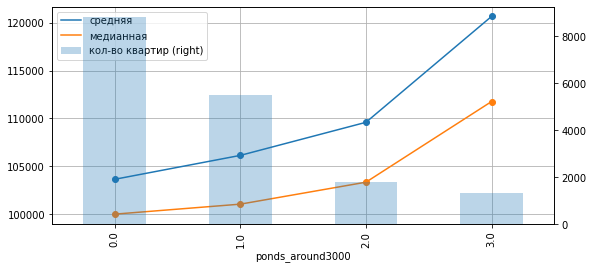

,средняя,медианная,кол-во квартир
ponds_around3000,,,
0.0,103638.0,99991.0,8827
1.0,106138.0,101036.0,5497
2.0,109596.0,103333.0,1775
3.0,120668.0,111765.0,1321


In [176]:
pvt = show_pivot_plot(re_data, 'price_meter', columns_of_interest[11])
pvt

In [177]:
print(corr_for_category(pvt, 1, 'средняя'))

0.9372588060447526


In [178]:
basic_row = 0.0
row_list = [1.0, 2.0, 3.0]
col_list = ['средняя', 'медианная']
for col in col_list:
    for row in row_list:
        diff_percent(pvt, basic_row, row, col)          

Изменение цены: средняя, 1.0 отличается от 0.0 на 2.4%
Изменение цены: средняя, 2.0 отличается от 0.0 на 5.7%
Изменение цены: средняя, 3.0 отличается от 0.0 на 16.4%
Изменение цены: медианная, 1.0 отличается от 0.0 на 1.0%
Изменение цены: медианная, 2.0 отличается от 0.0 на 3.3%
Изменение цены: медианная, 3.0 отличается от 0.0 на 11.8%


Наличие парков и прудов увеличивает среднюю стоимость метра.
- Парки увеличивают стоимость на 5-10%
- Пруды на 3-15%

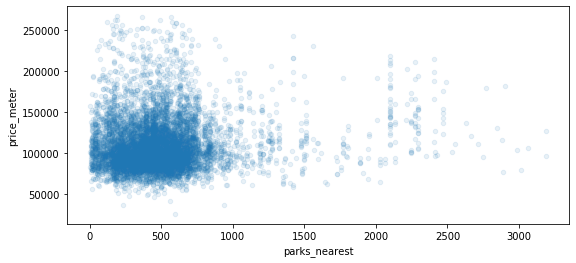

Коэффициент корреляции Пирсона 0.08 между  price_meter, parks_nearest


In [179]:
show_scatter(re_data, 1, 'price_meter', columns_of_interest[12])

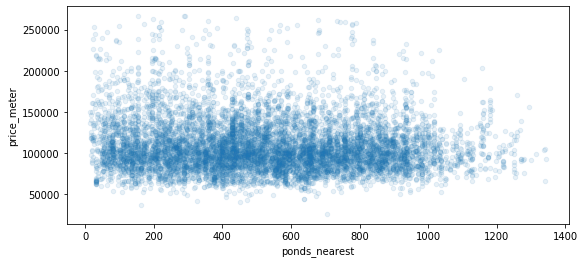

Коэффициент корреляции Пирсона -0.08 между  price_meter, ponds_nearest


In [180]:
show_scatter(re_data, 1, 'price_meter', columns_of_interest[13])

In [181]:
compare_corr

,"Корреляция с ценой, центр","Корреляция с ценой, все",Корреляция средних цен
cityCenters_nearest,-0.161173,-0.401999,нет
ceiling_height,0.0560623,0.353627,нет
total_area,-0.0710204,0.188663,нет
rooms,-0.185258,-0.0542728,нет
floor_category,NaN,NaN,NaN
cityCenters_nearest_km,-0.938936,-0.696814,Да
ceiling_category,NaN,NaN,NaN
first_month_exposition,-0.00533518,-0.00428175,нет
first_year_exposition,0.155813,0.0522139,нет
first_weekday_exposition,-0.0257451,-0.00781591,нет


### Шаг 5. Общий вывод

#### Предобработка данных
- Всего получено 23699 строк данных.
- Пропуски данных были исследованы, пришел к выводу, что целесообразно заполнить только пропуски в площади кухни и жилой плошади на основе данных об общей площади (есть для всех строк) и медианных значений для доля кухни в общей и доля жилой в общей соответственно.
- Были проанализированы все столбцы, найдены редкие и ошибочные значения. Данные с редкими значениями не удалялись, а были помечены в boolean столбце is_rare.
- Был найден один объект с ошибочной ценой, было принято решение не удалять данные, а исправить. В целях дальнейшего учета был создан новый boolean столбец is_row_amended, в котором отмечено сделанное исправление.
- Были проведены необходимые преобразования типов, созданы необходимые для последующего анализа столбцы


#### Анализ времени экспозиции
- Я пришел к выводу, что в исходных данных есть искажение, связанное с регламентов работы сервиса, предоставившего данные. Некоторые данные характеризуют не время продажи, а регламент сервиса. Всего было обнаружено почти 2000 таких строк Я заменил сроки экспозиции в этих строках на более вероятные сроки продаж объектов (подробно описано в соотв. разделе). Все редактированные данные были размещены в новом столбце days_exposition_amended. 
- Я сделал выводы по характерным срокам продаж на основе редактированных данных, посчитав, что некоторые аномальные данные вызваны регламентом работы сервиса, предоставившего эти данные. Редактированные данные сильно отличаются от исходных. Прежде чем основывать выводы на редактированных, а не исходных данных, необходимо, конечно, проанализировать регламент работы сервиса. Только в случае обнаружения в регламенте условий, подтверждающих мои выводы на основе анализа, можно полагаться на редактированные данные. Сейчас такой возможности нет, поэтому для сравнения представлены характерные времена и для исходных данных.

#### Зависимость стоимости квартир от локации
- Самая дорогие квартиры в Санкт-Петербурге и Пушкине, средняя стоимость квадратного метра в них примерно на 15% и 10%  больше ближайших конкурентов - поселки Кудрово и  Парголово
- Самые дешевые квартиры в Выборге, средняя стоимость квадратного метра в нем ниже более чем на 10% от ближайшего конкурента по цене - г. Всеволожск 
- Значительная разница между медианой и средней в локациях - Санкт-Петербург и Всеволожск, где есть необычно дорогие объекты

#### Выделение центра, зависимость стоимости квартир от расстояния до центра
- Выделен центр Санкт-Петербурга - радиус 3км
- Стоимость метра падает с ростом расстояния от центра, скорость падения в центре выше, чем в другой части. Проанализированы отклонения от основной тенденции снижения стоимости с ростом расстояния.
- Влияние самых дорогих объектов заметно сильнее, чем в остальных местах в радиусе 8 км от центра.

#### Анализ зависимости стоимости квадратного метра от параметров квартиры
- Коэффициент корреляции Пирсона стоимости квадратного метра и различных числовых параметров не превышает 0.4. Это свидетельствует об отсутствии явно выраженной линейной зависимости стоимости от таких параметров.
- Однако зависимость средних цен от категориальных данных заметно выше (для демонстрации такой зависимости применялся следующий метод: группируем данные по категориальному параметру - например, категория этажности, или категория высоты потолка), считаем среднюю цену для каждой полученной группы, затем смотрим зависимость средней цены от категории.
- Таким образом были выявлены и продемонстрированы зависимости средней стоимости недвижимости от числа комнат, общей площади, этажности, расстояния до центра, высоты потолков, наличия парков/прудов для всей базы и отдельно для центра Санкт-Петербурга.  
- Важное замечание. Мы можем категоризировать любой численный параметр, просто разбив весь диапазон значений на отрезки. Усреднив стоимость квадратного метра по группировке по диапазонам в таком категоризированном параметре, мы обнаруживаем гораздо более четкую и однозначную зависимость для некоторых параметров - например, высота потолков, кол-во комнат, расстояние до центра. В сводной таблице всех коэффициентов корреляции это хорошо демонстрирует параметр расстояние до центра (для столбца cityCenters_nearest указана корреляция цен, а для столбца cityCenters_nearest_km корреляция средних цен)
- Выявлены  сезонные и недельные колебания активности, зависимость средней стоимости от года начала продаж для всей базы и отдельно для центра Санкт-Петербурга.  
- Зависимости стоимости недвижимости от различных параметров для центра Санкт-Петербурга и для всей базы принципиально не отличаются. Однако есть достаточно значительные отличия в коэффициентах корреляции. В сводной таблице хорошо видно, что коэффициенты корреляции стоимости метра и следующих параметров: расстояние до центра, высота потолков, общая площадь квартиры для центра в несколько раз меньше, чем коэффициенты корреляции для всей базы. И наоборот, коэффициент корреляции стоимости метра с кол-вом комнат для центра в несколько раз выше, чем для всей базы. 


